<a href="https://colab.research.google.com/github/AnaCampos8898998/Machine_Learning/blob/Proyectos/Etherum_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ethereum**

**¿Qué es Ethereum?**

Ethereum es una tecnología que alberga dinero digital, pagos globales y
aplicaciones. La comunidad ha construido una próspera economía digital, nuevas formas audaces para que los creadores ganen en línea y mucho más. Está abierto a todos, al margen del lugar donde estén; lo único que se necesita es tener internet.

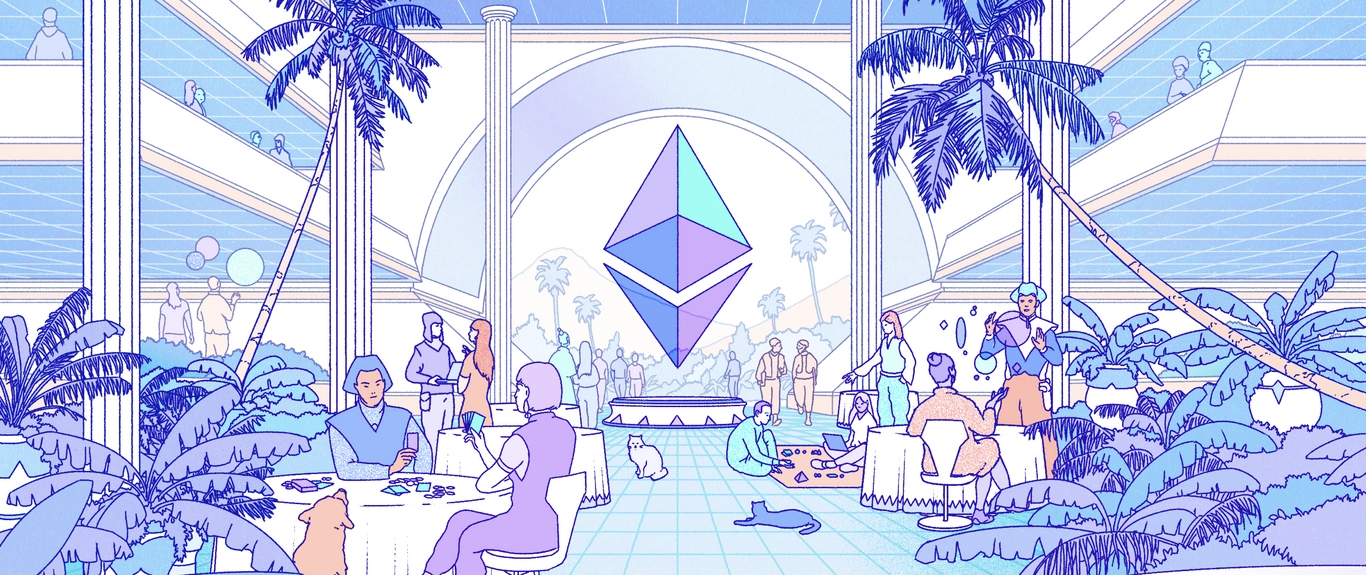



---



**Primer Paso:Conexión y librerias**

In [ ]:
#Se conecta con google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
np.random.seed(0)
import random
random.seed(0)
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [ ]:
eth=pd.read_csv('/content/drive/MyDrive/Machine Learning/Ethereum Historical Data.csv')
eth_copy=eth.copy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---




1.1 Mostrar los archivos del Dataset , su información (Conversión Tipo de objeto a Tipo Nummerica)



In [ ]:
eth.head()

Date     Price      Open      High       Low     Vol. Change %
0  09/21/2023  1,582.21  1,622.28  1,625.31  1,569.03  310.76K   -2.47%
1  09/20/2023  1,622.28  1,643.14  1,649.17  1,610.14  253.88K   -1.27%
2  09/19/2023  1,643.08  1,636.88  1,659.53  1,627.31  201.84K    0.38%
3  09/18/2023  1,636.92  1,622.63  1,668.87  1,609.69  302.35K    0.88%
4  09/17/2023  1,622.65  1,634.41  1,635.00  1,612.87  127.49K   -0.72%

In [ ]:
eth.shape

(1725, 7)

In [ ]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1725 non-null   object
 1   Price     1725 non-null   object
 2   Open      1725 non-null   object
 3   High      1725 non-null   object
 4   Low       1725 non-null   object
 5   Vol.      1725 non-null   object
 6   Change %  1725 non-null   object
dtypes: object(7)
memory usage: 94.5+ KB


1.2 Conversion a tipo Flotante

In [ ]:
# Reemplaza las comas como separadores de miles por nada (elimínalas) y luego convierte a float
eth['Price'] = eth['Price'].str.replace(',', '').astype(float)
eth['Open'] = eth['Open'].str.replace(',', '').astype(float)
eth['High'] = eth['High'].str.replace(',', '').astype(float)
eth['Low'] = eth['Low'].str.replace(',', '').astype(float)


In [ ]:
eth.head()

Date    Price     Open     High      Low     Vol. Change %
0  09/21/2023  1582.21  1622.28  1625.31  1569.03  310.76K   -2.47%
1  09/20/2023  1622.28  1643.14  1649.17  1610.14  253.88K   -1.27%
2  09/19/2023  1643.08  1636.88  1659.53  1627.31  201.84K    0.38%
3  09/18/2023  1636.92  1622.63  1668.87  1609.69  302.35K    0.88%
4  09/17/2023  1622.65  1634.41  1635.00  1612.87  127.49K   -0.72%

In [ ]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1725 non-null   object 
 1   Price     1725 non-null   float64
 2   Open      1725 non-null   float64
 3   High      1725 non-null   float64
 4   Low       1725 non-null   float64
 5   Vol.      1725 non-null   object 
 6   Change %  1725 non-null   object 
dtypes: float64(4), object(3)
memory usage: 94.5+ KB


Conversión de fecha

In [ ]:
print(eth['Date'])

0       09/21/2023
1       09/20/2023
2       09/19/2023
3       09/18/2023
4       09/17/2023
           ...    
1720    01/05/2019
1721    01/04/2019
1722    01/03/2019
1723    01/02/2019
1724    01/01/2019
Name: Date, Length: 1725, dtype: object


In [ ]:
eth.index=pd.to_datetime(eth['Date'])
print(eth.index)

DatetimeIndex(['2023-09-21', '2023-09-20', '2023-09-19', '2023-09-18',
               '2023-09-17', '2023-09-16', '2023-09-15', '2023-09-14',
               '2023-09-13', '2023-09-12',
               ...
               '2019-01-10', '2019-01-09', '2019-01-08', '2019-01-07',
               '2019-01-06', '2019-01-05', '2019-01-04', '2019-01-03',
               '2019-01-02', '2019-01-01'],
              dtype='datetime64[ns]', name='Date', length=1725, freq=None)


Convertirla al pacifico

In [ ]:
eth.index = eth.index.tz_localize('UTC').tz_convert('US/Pacific')
print(eth.index)

DatetimeIndex(['2023-09-20 17:00:00-07:00', '2023-09-19 17:00:00-07:00',
               '2023-09-18 17:00:00-07:00', '2023-09-17 17:00:00-07:00',
               '2023-09-16 17:00:00-07:00', '2023-09-15 17:00:00-07:00',
               '2023-09-14 17:00:00-07:00', '2023-09-13 17:00:00-07:00',
               '2023-09-12 17:00:00-07:00', '2023-09-11 17:00:00-07:00',
               ...
               '2019-01-09 16:00:00-08:00', '2019-01-08 16:00:00-08:00',
               '2019-01-07 16:00:00-08:00', '2019-01-06 16:00:00-08:00',
               '2019-01-05 16:00:00-08:00', '2019-01-04 16:00:00-08:00',
               '2019-01-03 16:00:00-08:00', '2019-01-02 16:00:00-08:00',
               '2019-01-01 16:00:00-08:00', '2018-12-31 16:00:00-08:00'],
              dtype='datetime64[ns, US/Pacific]', name='Date', length=1725, freq=None)


In [ ]:
eth.sort_index(inplace=True)
del eth['Date']

In [ ]:
eth.head()

Price    Open    High     Low   Vol. Change %
Date                                                                     
2018-12-31 16:00:00-08:00  139.61  131.90  140.51  130.67  3.05M    5.84%
2019-01-01 16:00:00-08:00  152.95  139.58  155.93  138.74  5.51M    9.56%
2019-01-02 16:00:00-08:00  146.94  152.96  154.30  144.39  4.02M   -3.93%
2019-01-03 16:00:00-08:00  152.86  146.94  155.40  145.29  4.92M    4.03%
2019-01-04 16:00:00-08:00  153.49  152.87  159.78  152.84  4.85M    0.41%

In [ ]:
eth.shape

(1725, 6)

**Graficar**

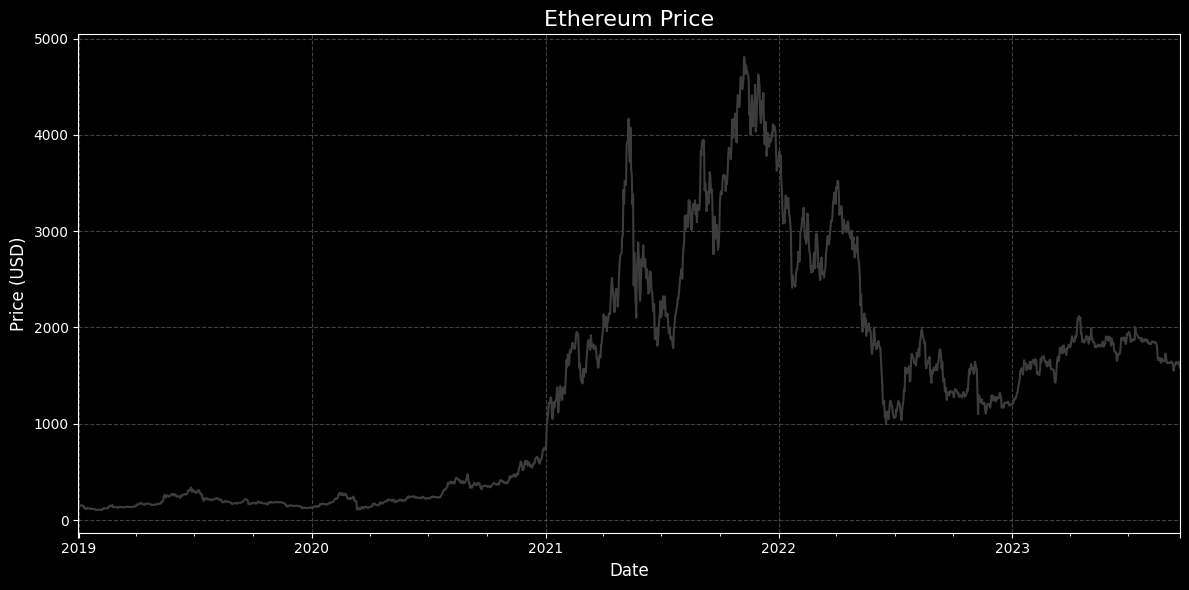

In [ ]:
import matplotlib.pyplot as plt

eth_color = '#3C3C3D'
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
eth['Price'].plot(color=eth_color)
plt.title('Ethereum Price', fontsize=16, color='white')  # Título con fuente blanca
plt.xlabel('Date', fontsize=12, color='white')  # Eje x con fuente blanca
plt.ylabel('Price (USD)', fontsize=12, color='white')  # Eje y con fuente blanca
plt.grid(True, color='gray', alpha=0.5, linestyle='--')  # Cuadrícula de fondo
plt.tight_layout()  # Ajusta los márgenes
plt.show()


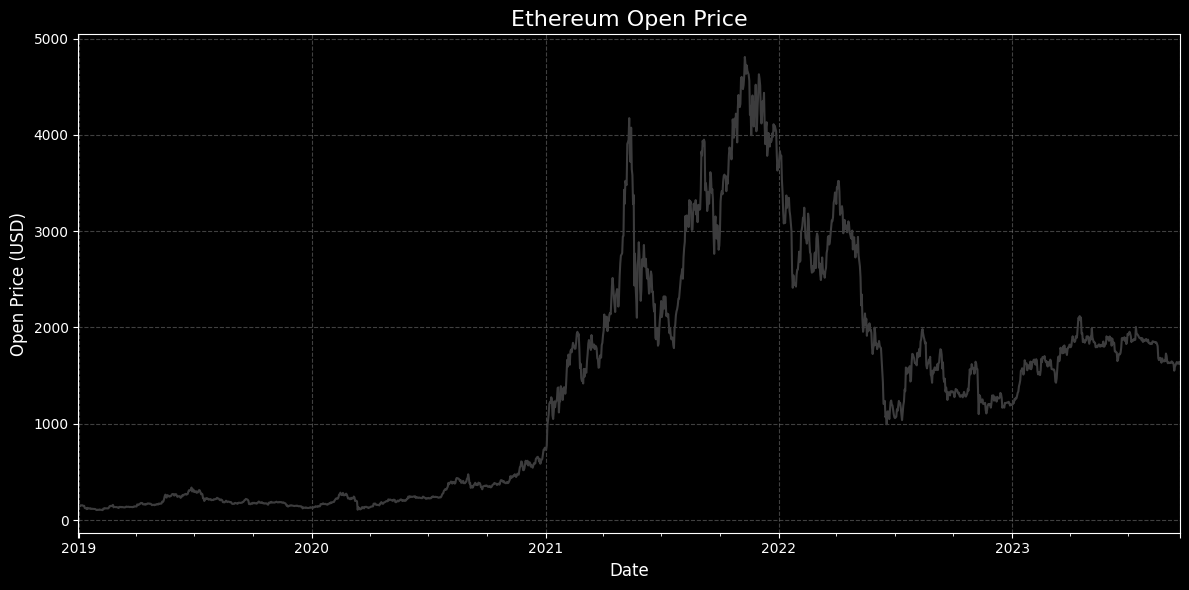

In [ ]:
eth_color = '#3C3C3D'
plt.style.use('dark_background')  # Fondo oscuro
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
eth['Open'].plot(color=eth_color)
plt.title('Ethereum Open Price', fontsize=16, color='white')  # Título con fuente blanca
plt.xlabel('Date', fontsize=12, color='white')  # Eje x con fuente blanca
plt.ylabel('Open Price (USD)', fontsize=12, color='white')  # Eje y con fuente blanca
plt.grid(True, color='gray', alpha=0.5, linestyle='--')  # Cuadrícula de fondo
plt.tight_layout()  # Ajusta los márgenes
plt.show()


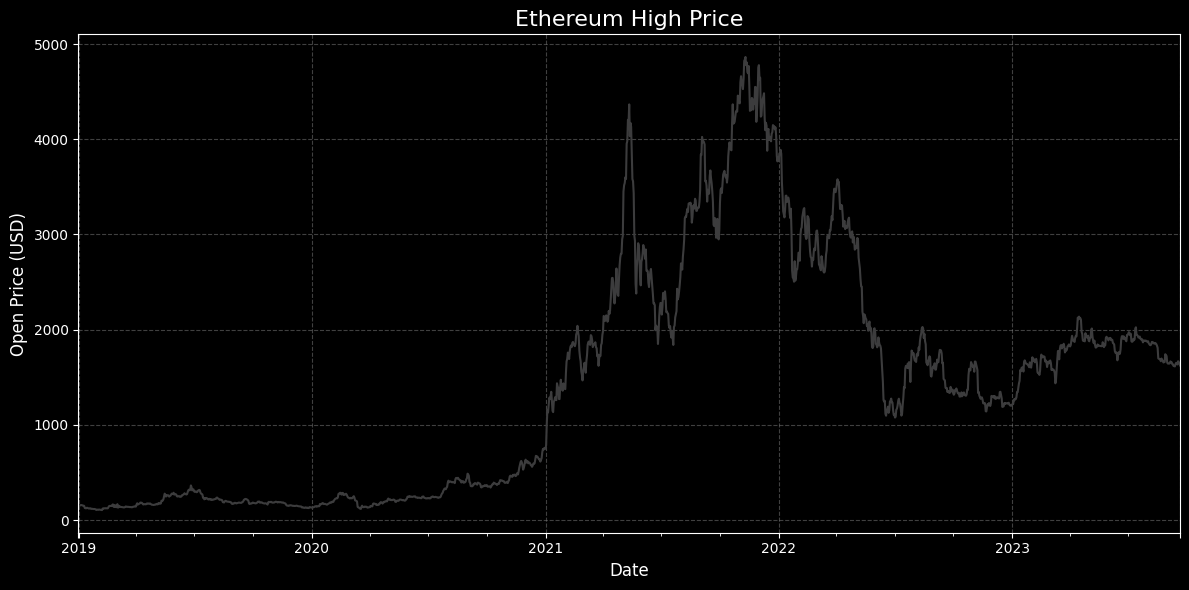

In [ ]:
eth_color = '#3C3C3D'
plt.style.use('dark_background')  # Fondo oscuro
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
eth['High'].plot(color=eth_color)
plt.title('Ethereum High Price', fontsize=16, color='white')  # Título con fuente blanca
plt.xlabel('Date', fontsize=12, color='white')  # Eje x con fuente blanca
plt.ylabel('Open Price (USD)', fontsize=12, color='white')  # Eje y con fuente blanca
plt.grid(True, color='gray', alpha=0.5, linestyle='--')  # Cuadrícula de fondo
plt.tight_layout()  # Ajusta los márgenes
plt.show()



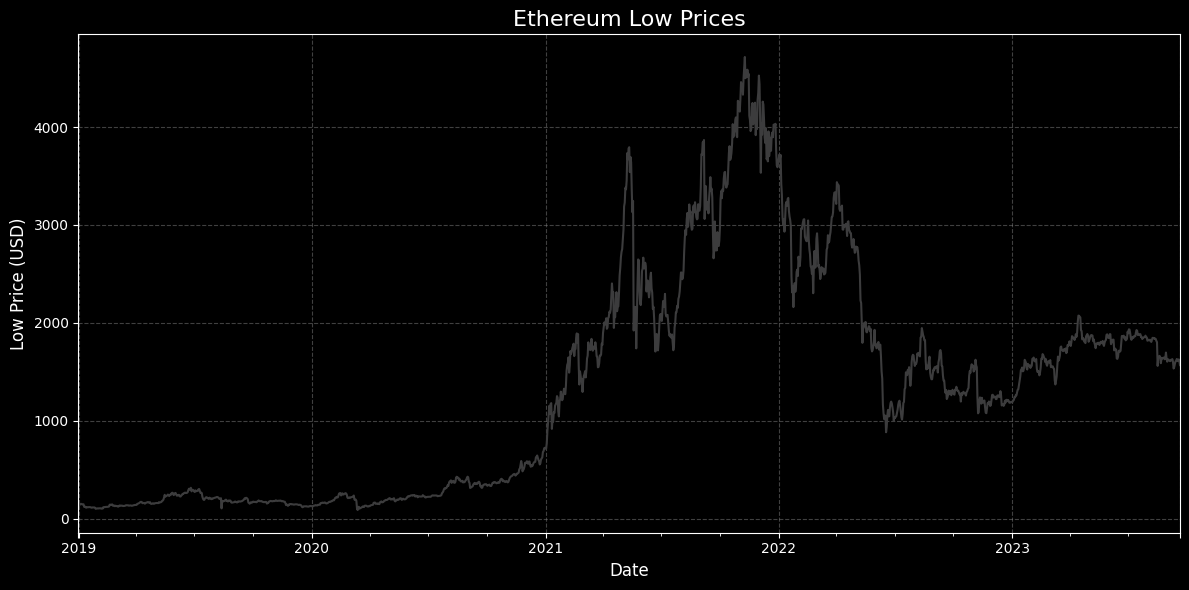

In [ ]:

plt.style.use('dark_background')  # Fondo oscuro
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
eth['Low'].plot(color=eth_color)
plt.title('Ethereum Low Prices', fontsize=16, color='white')  # Título con fuente blanca
plt.xlabel('Date', fontsize=12, color='white')  # Eje x con fuente blanca
plt.ylabel('Low Price (USD)', fontsize=12, color='white')  # Eje y con fuente blanca
plt.grid(True, color='gray', alpha=0.5, linestyle='--')  # Cuadrícula de fondo
plt.tight_layout()  # Ajusta los márgenes
plt.show()


Organizar fechas de menor al mayor

In [ ]:
print(eth.index.date)

[datetime.date(2018, 12, 31) datetime.date(2019, 1, 1)
 datetime.date(2019, 1, 2) ... datetime.date(2023, 9, 18)
 datetime.date(2023, 9, 19) datetime.date(2023, 9, 20)]


Por cada fecha que saque el año

In [ ]:
eth['Year']=eth.index.year
eth['Month']=eth.index.month
eth.head()

Price    Open    High     Low   Vol. Change %  \
Date                                                                        
2018-12-31 16:00:00-08:00  139.61  131.90  140.51  130.67  3.05M    5.84%   
2019-01-01 16:00:00-08:00  152.95  139.58  155.93  138.74  5.51M    9.56%   
2019-01-02 16:00:00-08:00  146.94  152.96  154.30  144.39  4.02M   -3.93%   
2019-01-03 16:00:00-08:00  152.86  146.94  155.40  145.29  4.92M    4.03%   
2019-01-04 16:00:00-08:00  153.49  152.87  159.78  152.84  4.85M    0.41%   

                           Year  Month  
Date                                    
2018-12-31 16:00:00-08:00  2018     12  
2019-01-01 16:00:00-08:00  2019      1  
2019-01-02 16:00:00-08:00  2019      1  
2019-01-03 16:00:00-08:00  2019      1  
2019-01-04 16:00:00-08:00  2019      1

In [ ]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1725 entries, 2018-12-31 16:00:00-08:00 to 2023-09-20 17:00:00-07:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1725 non-null   float64
 1   Open      1725 non-null   float64
 2   High      1725 non-null   float64
 3   Low       1725 non-null   float64
 4   Vol.      1725 non-null   object 
 5   Change %  1725 non-null   object 
 6   Year      1725 non-null   int64  
 7   Month     1725 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 121.3+ KB


Si es del ultimo mes

In [ ]:
eth['Last_Day_Month']=eth.index.is_month_end
eth.head(90)

Price    Open    High     Low    Vol. Change %  \
Date                                                                         
2018-12-31 16:00:00-08:00  139.61  131.90  140.51  130.67   3.05M    5.84%   
2019-01-01 16:00:00-08:00  152.95  139.58  155.93  138.74   5.51M    9.56%   
2019-01-02 16:00:00-08:00  146.94  152.96  154.30  144.39   4.02M   -3.93%   
2019-01-03 16:00:00-08:00  152.86  146.94  155.40  145.29   4.92M    4.03%   
2019-01-04 16:00:00-08:00  153.49  152.87  159.78  152.84   4.85M    0.41%   
...                           ...     ...     ...     ...     ...      ...   
2019-03-26 17:00:00-07:00  139.65  134.37  140.08  133.89  15.47M    3.93%   
2019-03-27 17:00:00-07:00  138.15  139.63  140.33  137.68   9.52M   -1.08%   
2019-03-28 17:00:00-07:00  143.38  138.17  143.53  138.13  12.09M    3.79%   
2019-03-29 17:00:00-07:00  142.65  143.38  145.85  140.43  12.81M   -0.51%   
2019-03-30 17:00:00-07:00  141.79  142.65  142.69  140.71   9.33M   -0.60%   

                           Year  Month  Last_Day_Month  
Date                                                    
2018-12-31 16:00:00-08:00  2018     12            True  
2019-01-01 16:00:00-08:00  2019      1           False  
2019-01-02 16:00:00-08:00  2019      1           False  
2019-01-03 16:00:00-08:00  2019      1           False  
2019-01-04 16:00:00-08:00  2019      1           False  
...                         ...    ...             ...  
2019-03-26 17:00:00-07:00  2019      3           False  
2019-03-27 17:00:00-07:00  2019      3           False  
2019-03-28 17:00:00-07:00  2019      3           False  
2019-03-29 17:00:00-07:00  2019      3           False  
2019-03-30 17:00:00-07:00  2019      3           False  

[90 rows x 9 columns]

In [ ]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1725 entries, 2018-12-31 16:00:00-08:00 to 2023-09-20 17:00:00-07:00
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           1725 non-null   float64
 1   Open            1725 non-null   float64
 2   High            1725 non-null   float64
 3   Low             1725 non-null   float64
 4   Vol.            1725 non-null   object 
 5   Change %        1725 non-null   object 
 6   Year            1725 non-null   int64  
 7   Month           1725 non-null   int64  
 8   Last_Day_Month  1725 non-null   bool   
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 123.0+ KB


**3.3 Crear la salida DEL DATASET**

Es true cuando open es mayor que price , columna binaria trend

In [ ]:
eth['trend']=(eth['Open']-eth['Price'])/eth['Open']
eth['trend'] = eth['trend'] > 0
eth.head()

Price    Open    High     Low   Vol. Change %  \
Date                                                                        
2018-12-31 16:00:00-08:00  139.61  131.90  140.51  130.67  3.05M    5.84%   
2019-01-01 16:00:00-08:00  152.95  139.58  155.93  138.74  5.51M    9.56%   
2019-01-02 16:00:00-08:00  146.94  152.96  154.30  144.39  4.02M   -3.93%   
2019-01-03 16:00:00-08:00  152.86  146.94  155.40  145.29  4.92M    4.03%   
2019-01-04 16:00:00-08:00  153.49  152.87  159.78  152.84  4.85M    0.41%   

                           Year  Month  Last_Day_Month  trend  
Date                                                           
2018-12-31 16:00:00-08:00  2018     12            True  False  
2019-01-01 16:00:00-08:00  2019      1           False  False  
2019-01-02 16:00:00-08:00  2019      1           False   True  
2019-01-03 16:00:00-08:00  2019      1           False  False  
2019-01-04 16:00:00-08:00  2019      1           False  False



---



**PARTE CUATRO**

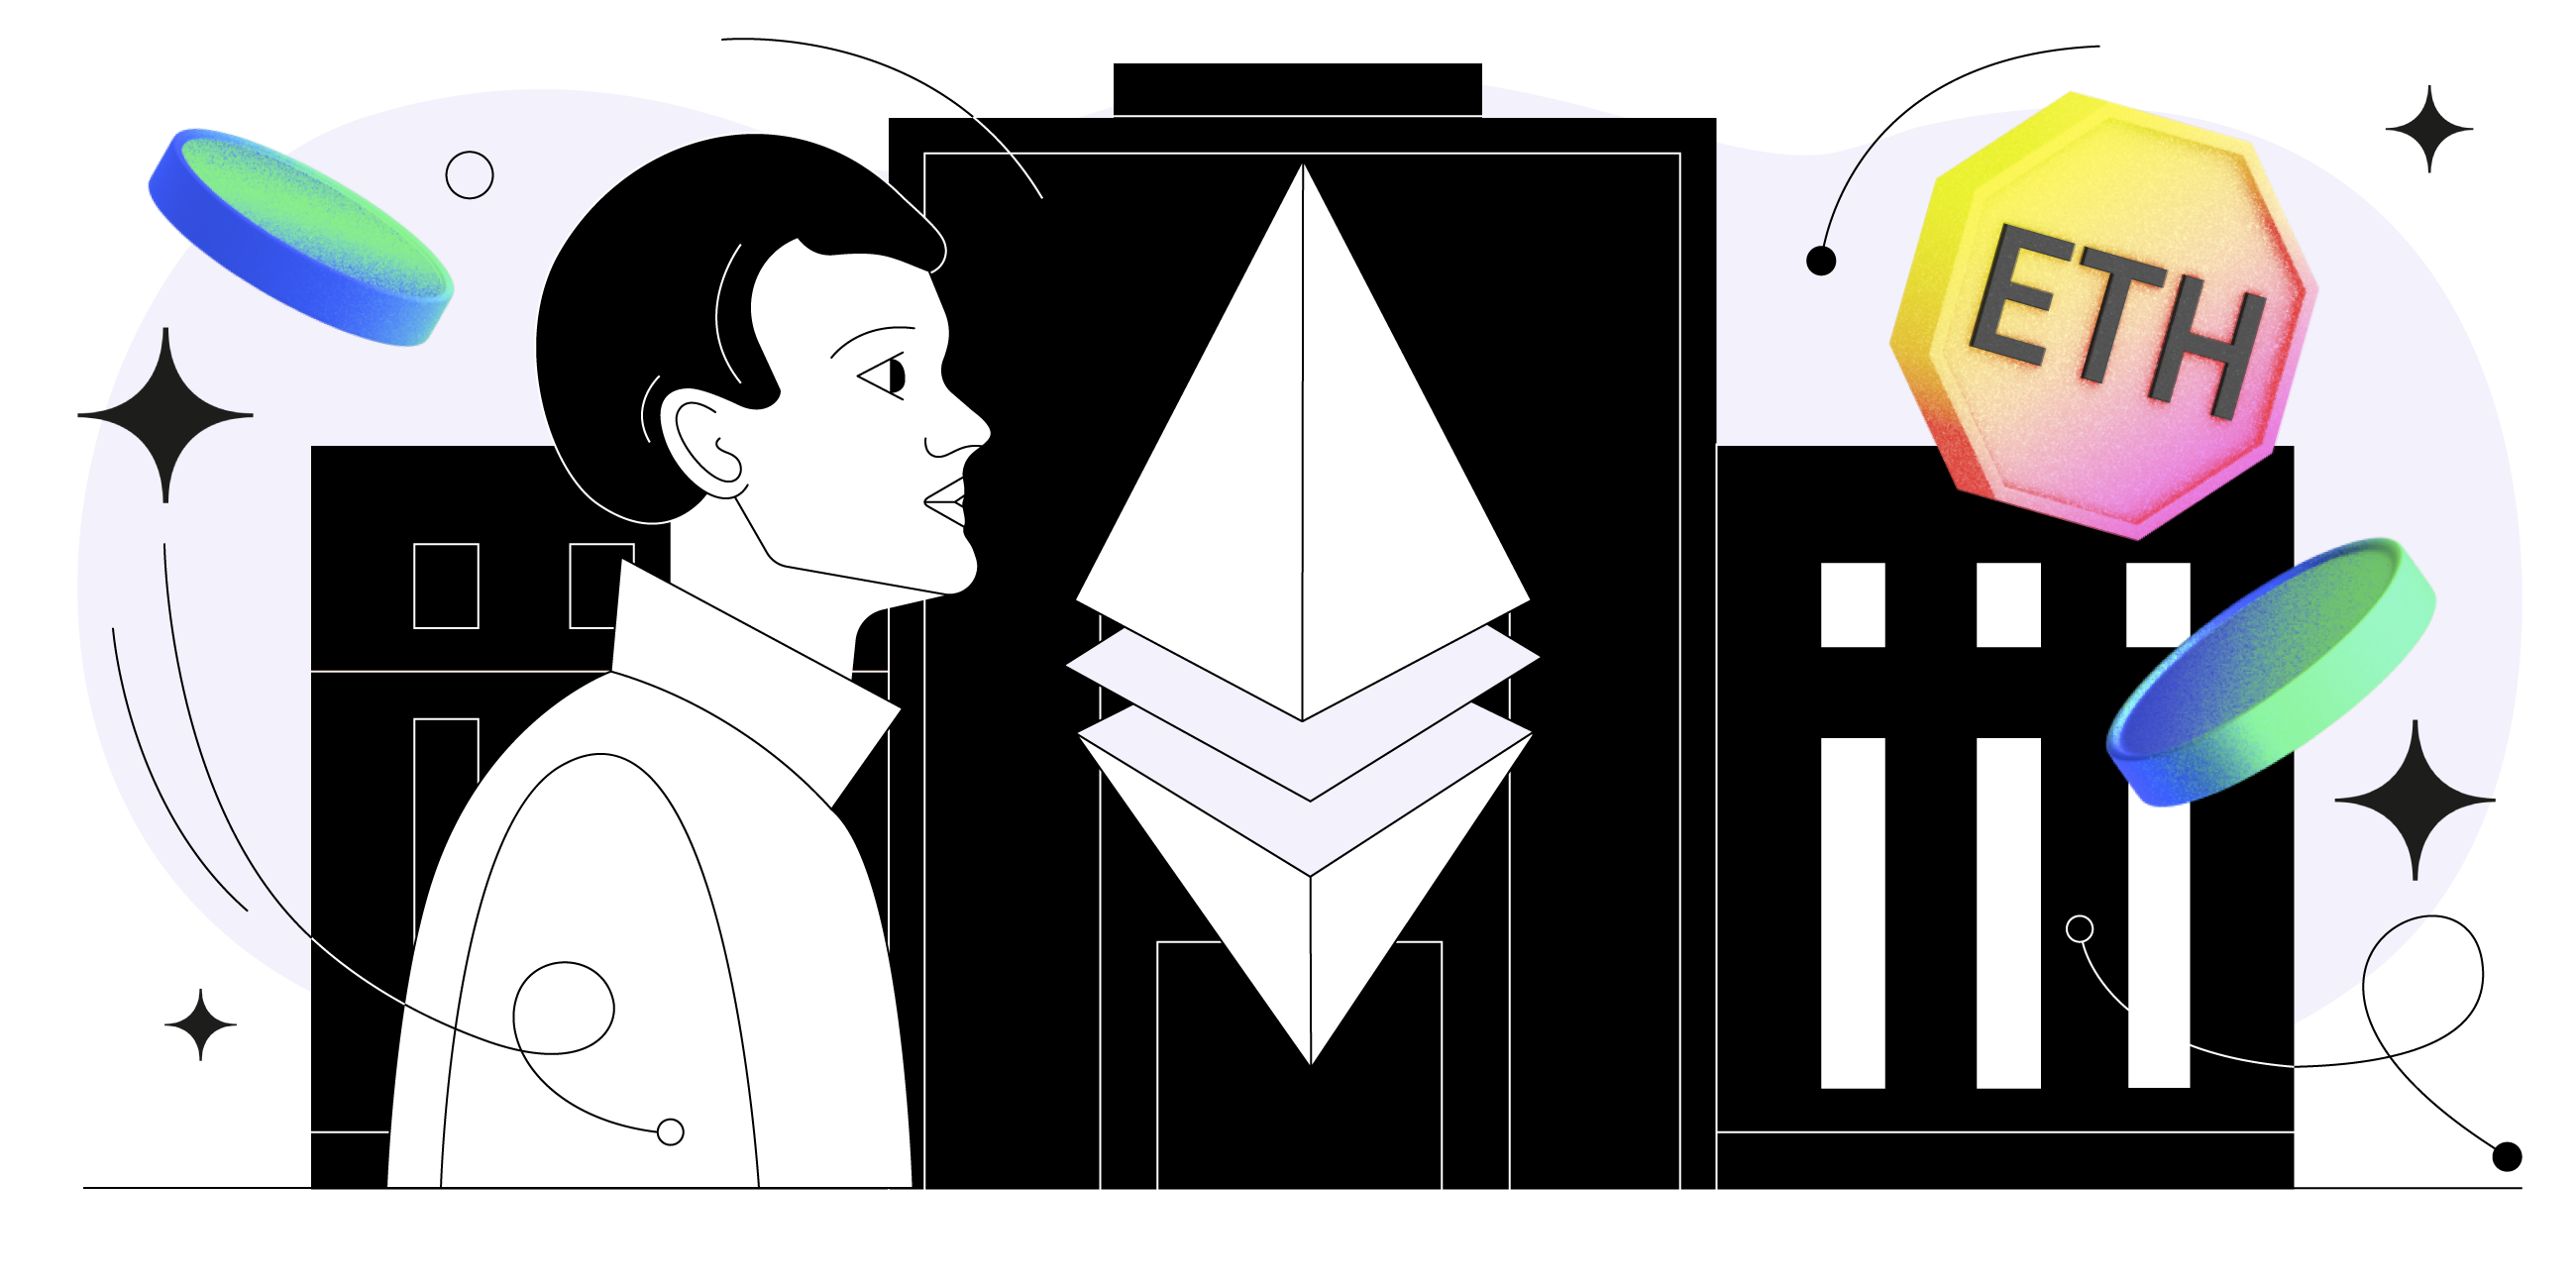

**4.4 Day of the weekend**

Una columna donde me diga sines un lunes o martes , basando sobre el index , de igual manera que el month

In [ ]:
eth['dayofweek'] = eth.index.dayofweek
eth.head(10)

Price    Open    High     Low   Vol. Change %  \
Date                                                                        
2018-12-31 16:00:00-08:00  139.61  131.90  140.51  130.67  3.05M    5.84%   
2019-01-01 16:00:00-08:00  152.95  139.58  155.93  138.74  5.51M    9.56%   
2019-01-02 16:00:00-08:00  146.94  152.96  154.30  144.39  4.02M   -3.93%   
2019-01-03 16:00:00-08:00  152.86  146.94  155.40  145.29  4.92M    4.03%   
2019-01-04 16:00:00-08:00  153.49  152.87  159.78  152.84  4.85M    0.41%   
2019-01-05 16:00:00-08:00  154.96  153.48  158.29  148.63  4.23M    0.96%   
2019-01-06 16:00:00-08:00  149.96  154.96  156.36  148.47  2.88M   -3.23%   
2019-01-07 16:00:00-08:00  148.41  149.96  152.21  146.29  3.04M   -1.03%   
2019-01-08 16:00:00-08:00  148.79  148.41  152.57  147.95  2.34M    0.26%   
2019-01-09 16:00:00-08:00  125.63  148.78  150.09  121.98  6.48M  -15.56%   

                           Year  Month  Last_Day_Month  trend  dayofweek  
Date                                                                      
2018-12-31 16:00:00-08:00  2018     12            True  False          0  
2019-01-01 16:00:00-08:00  2019      1           False  False          1  
2019-01-02 16:00:00-08:00  2019      1           False   True          2  
2019-01-03 16:00:00-08:00  2019      1           False  False          3  
2019-01-04 16:00:00-08:00  2019      1           False  False          4  
2019-01-05 16:00:00-08:00  2019      1           False  False          5  
2019-01-06 16:00:00-08:00  2019      1           False   True          6  
2019-01-07 16:00:00-08:00  2019      1           False   True          0  
2019-01-08 16:00:00-08:00  2019      1           False  False          1  
2019-01-09 16:00:00-08:00  2019      1           False   True          2

**4.2 Lag Features**

Retrasar la señal , cuando le digo que es un dia , respecto a la columna price, depende el dia de retraso que tenga

In [ ]:
#Lag Features
eth['feature_lag_1_day'] = eth['Open'].shift(1, freq='D')
eth['feature_lag_2_day'] = eth['Open'].shift(2, freq='D')
eth['feature_lag_4_day'] = eth['Open'].shift(4, freq='D')
eth.head()

Price    Open    High     Low   Vol. Change %  \
Date                                                                        
2018-12-31 16:00:00-08:00  139.61  131.90  140.51  130.67  3.05M    5.84%   
2019-01-01 16:00:00-08:00  152.95  139.58  155.93  138.74  5.51M    9.56%   
2019-01-02 16:00:00-08:00  146.94  152.96  154.30  144.39  4.02M   -3.93%   
2019-01-03 16:00:00-08:00  152.86  146.94  155.40  145.29  4.92M    4.03%   
2019-01-04 16:00:00-08:00  153.49  152.87  159.78  152.84  4.85M    0.41%   

                           Year  Month  Last_Day_Month  trend  dayofweek  \
Date                                                                       
2018-12-31 16:00:00-08:00  2018     12            True  False          0   
2019-01-01 16:00:00-08:00  2019      1           False  False          1   
2019-01-02 16:00:00-08:00  2019      1           False   True          2   
2019-01-03 16:00:00-08:00  2019      1           False  False          3   
2019-01-04 16:00:00-08:00  2019      1           False  False          4   

                           feature_lag_1_day  feature_lag_2_day  \
Date                                                              
2018-12-31 16:00:00-08:00                NaN                NaN   
2019-01-01 16:00:00-08:00             131.90                NaN   
2019-01-02 16:00:00-08:00             139.58             131.90   
2019-01-03 16:00:00-08:00             152.96             139.58   
2019-01-04 16:00:00-08:00             146.94             152.96   

                           feature_lag_4_day  
Date                                          
2018-12-31 16:00:00-08:00                NaN  
2019-01-01 16:00:00-08:00                NaN  
2019-01-02 16:00:00-08:00                NaN  
2019-01-03 16:00:00-08:00                NaN  
2019-01-04 16:00:00-08:00              131.9

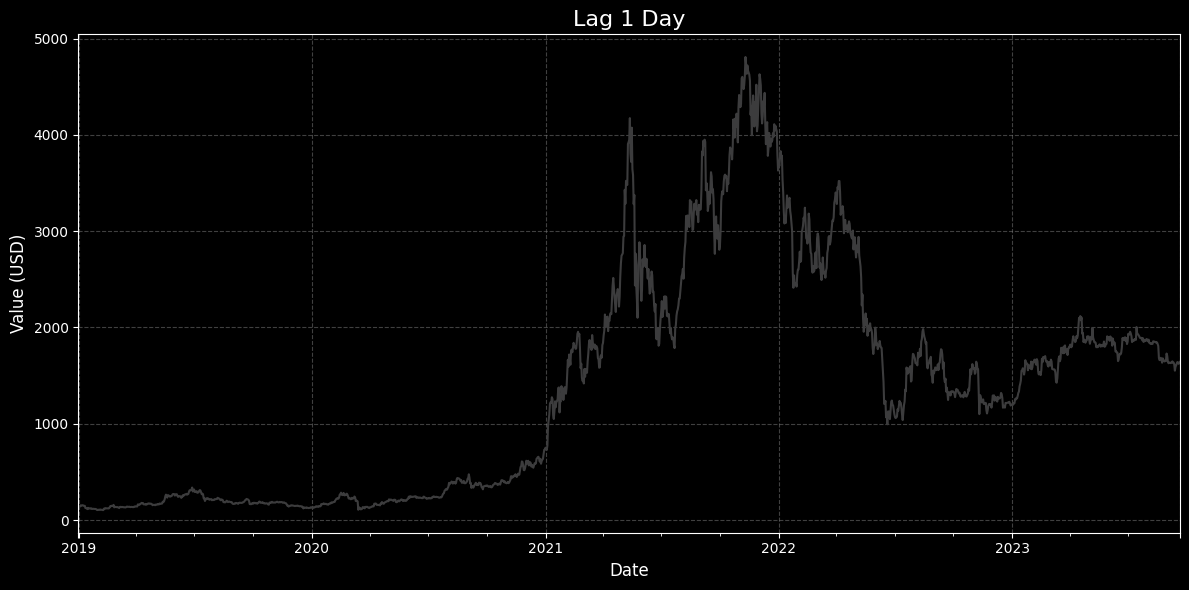

In [ ]:
plt.style.use('dark_background')  # Fondo oscuro
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
eth['feature_lag_1_day'].plot(color=eth_color)
plt.title('Lag 1 Day', fontsize=16, color='white')  # Título con fuente blanca
plt.xlabel('Date', fontsize=12, color='white')  # Eje x con fuente blanca
plt.ylabel('Value (USD)', fontsize=12, color='white')  # Eje y con fuente blanca
plt.grid(True, color='gray', alpha=0.5, linestyle='--')  # Cuadrícula de fondo
plt.tight_layout()  # Ajusta los márgenes
plt.show()



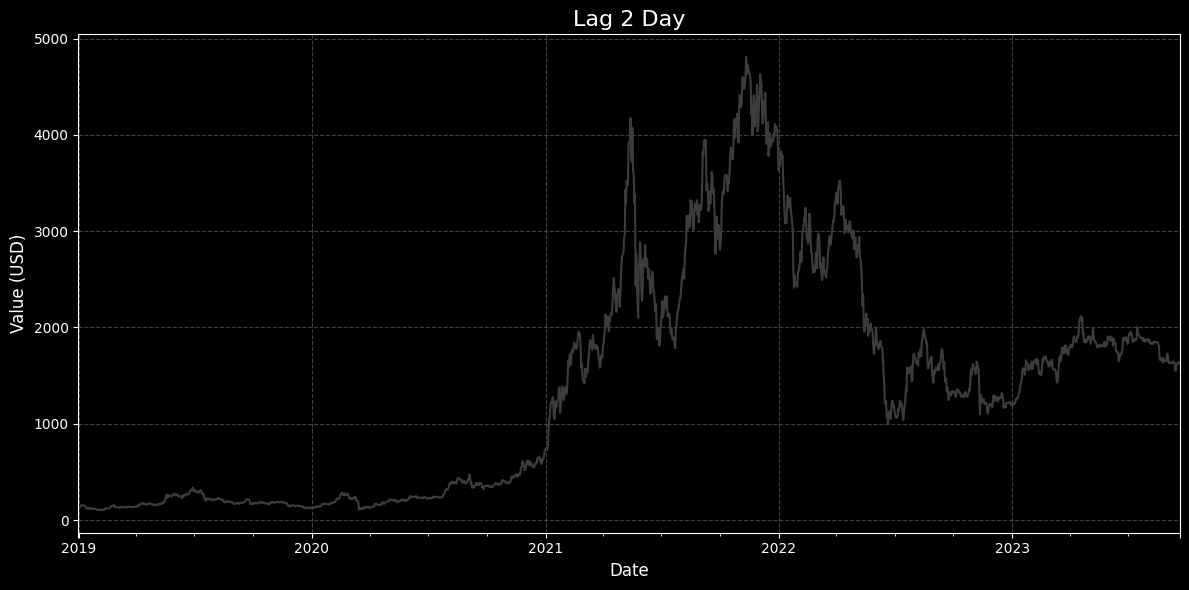

In [ ]:
plt.style.use('dark_background')  # Fondo oscuro
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
eth['feature_lag_2_day'].plot(color=eth_color)
plt.title('Lag 2 Day', fontsize=16, color='white')  # Título con fuente blanca
plt.xlabel('Date', fontsize=12, color='white')  # Eje x con fuente blanca
plt.ylabel('Value (USD)', fontsize=12, color='white')  # Eje y con fuente blanca
plt.grid(True, color='gray', alpha=0.5, linestyle='--')  # Cuadrícula de fondo
plt.tight_layout()  # Ajusta los márgenes
plt.show()


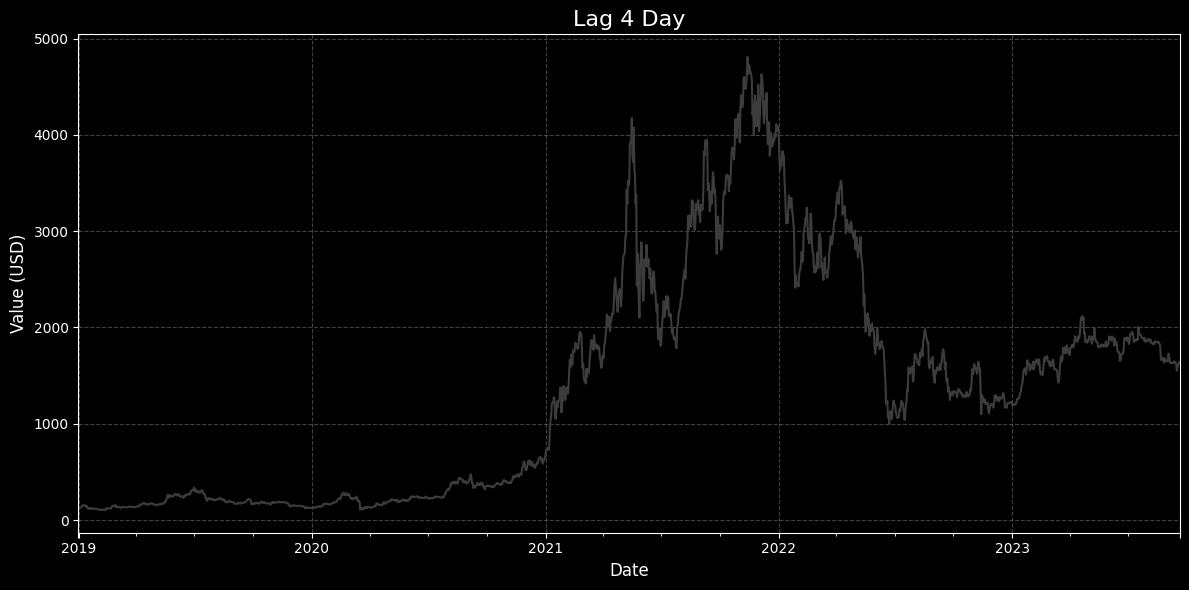

In [ ]:
plt.style.use('dark_background')  # Fondo oscuro
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
eth['feature_lag_4_day'].plot(color=eth_color)
plt.title('Lag 4 Day', fontsize=16, color='white')  # Título con fuente blanca
plt.xlabel('Date', fontsize=12, color='white')  # Eje x con fuente blanca
plt.ylabel('Value (USD)', fontsize=12, color='white')  # Eje y con fuente blanca
plt.grid(True, color='gray', alpha=0.5, linestyle='--')  # Cuadrícula de fondo
plt.tight_layout()  # Ajusta los márgenes
plt.show()


**4.3 Rolling-Window Features**

Los rolling son ventanas fijas

In [ ]:
eth['feature_rolling_2_day'] = eth['Price'].rolling(window=2).mean()
eth['feature_rolling_7_day'] = eth['Price'].rolling(window=7).mean()
eth['feature_rolling_10_day'] = eth['Price'].rolling(window=10).mean()
eth.head()

Price    Open    High     Low   Vol. Change %  \
Date                                                                        
2018-12-31 16:00:00-08:00  139.61  131.90  140.51  130.67  3.05M    5.84%   
2019-01-01 16:00:00-08:00  152.95  139.58  155.93  138.74  5.51M    9.56%   
2019-01-02 16:00:00-08:00  146.94  152.96  154.30  144.39  4.02M   -3.93%   
2019-01-03 16:00:00-08:00  152.86  146.94  155.40  145.29  4.92M    4.03%   
2019-01-04 16:00:00-08:00  153.49  152.87  159.78  152.84  4.85M    0.41%   

                           Year  Month  Last_Day_Month  trend  dayofweek  \
Date                                                                       
2018-12-31 16:00:00-08:00  2018     12            True  False          0   
2019-01-01 16:00:00-08:00  2019      1           False  False          1   
2019-01-02 16:00:00-08:00  2019      1           False   True          2   
2019-01-03 16:00:00-08:00  2019      1           False  False          3   
2019-01-04 16:00:00-08:00  2019      1           False  False          4   

                           feature_lag_1_day  feature_lag_2_day  \
Date                                                              
2018-12-31 16:00:00-08:00                NaN                NaN   
2019-01-01 16:00:00-08:00             131.90                NaN   
2019-01-02 16:00:00-08:00             139.58             131.90   
2019-01-03 16:00:00-08:00             152.96             139.58   
2019-01-04 16:00:00-08:00             146.94             152.96   

                           feature_lag_4_day  feature_rolling_2_day  \
Date                                                                  
2018-12-31 16:00:00-08:00                NaN                    NaN   
2019-01-01 16:00:00-08:00                NaN                146.280   
2019-01-02 16:00:00-08:00                NaN                149.945   
2019-01-03 16:00:00-08:00                NaN                149.900   
2019-01-04 16:00:00-08:00              131.9                153.175   

                           feature_rolling_7_day  feature_rolling_10_day  
Date                                                                      
2018-12-31 16:00:00-08:00                    NaN                     NaN  
2019-01-01 16:00:00-08:00                    NaN                     NaN  
2019-01-02 16:00:00-08:00                    NaN                     NaN  
2019-01-03 16:00:00-08:00                    NaN                     NaN  
2019-01-04 16:00:00-08:00                    NaN                     NaN

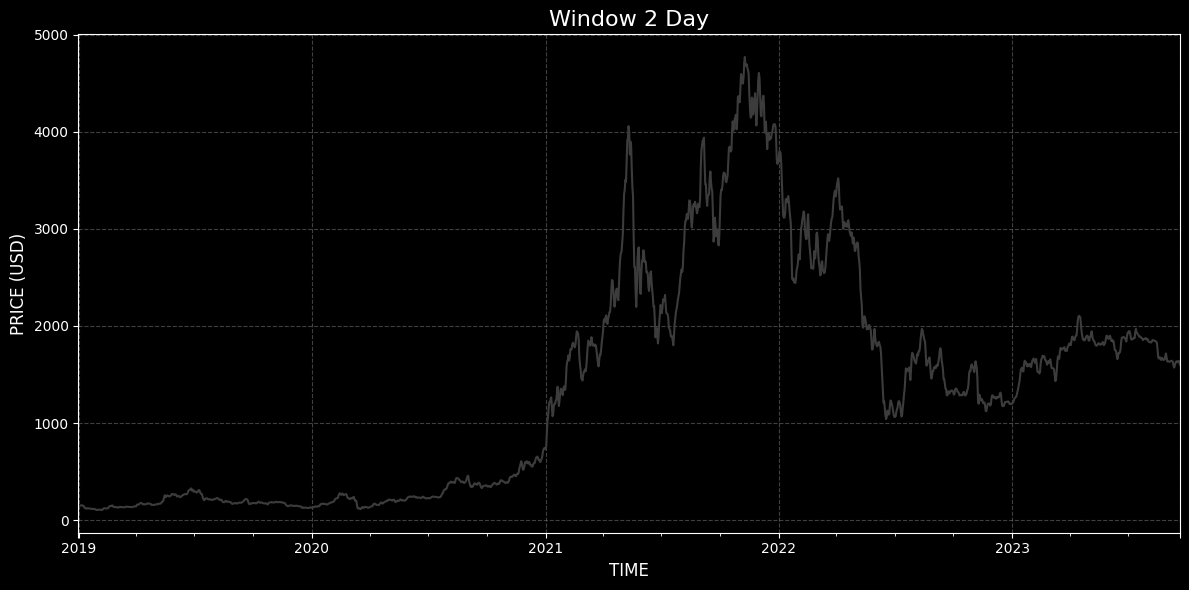

In [ ]:
plt.style.use('dark_background')  # Fondo oscuro
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
eth['feature_rolling_2_day'].plot(color=eth_color)
plt.title('Window 2 Day', fontsize=16, color='white')  # Título con fuente blanca
plt.xlabel('TIME', fontsize=12, color='white')  # Eje x con fuente blanca
plt.ylabel('PRICE (USD)', fontsize=12, color='white')  # Eje y con fuente blanca
plt.grid(True, color='gray', alpha=0.5, linestyle='--')  # Cuadrícula de fondo
plt.tight_layout()  # Ajusta los márgenes
plt.show()

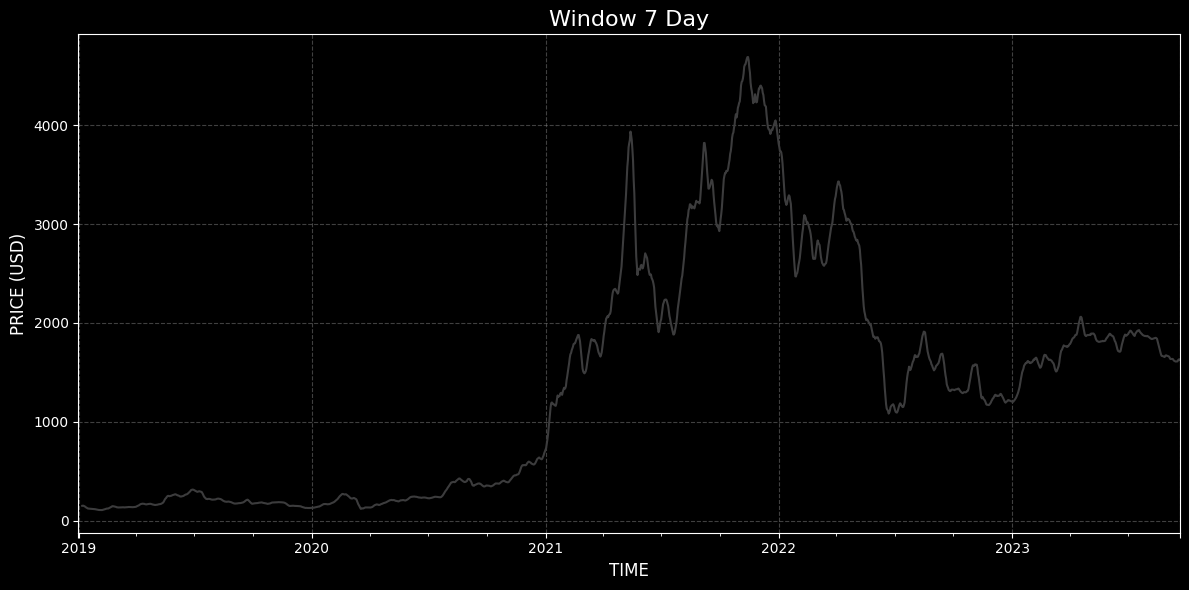

In [ ]:
plt.style.use('dark_background')  # Fondo oscuro
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
eth['feature_rolling_7_day'].plot(color=eth_color)
plt.title('Window 7 Day', fontsize=16, color='white')  # Título con fuente blanca
plt.xlabel('TIME', fontsize=12, color='white')  # Eje x con fuente blanca
plt.ylabel('PRICE (USD)', fontsize=12, color='white')  # Eje y con fuente blanca
plt.grid(True, color='gray', alpha=0.5, linestyle='--')  # Cuadrícula de fondo
plt.tight_layout()  # Ajusta los márgenes
plt.show()

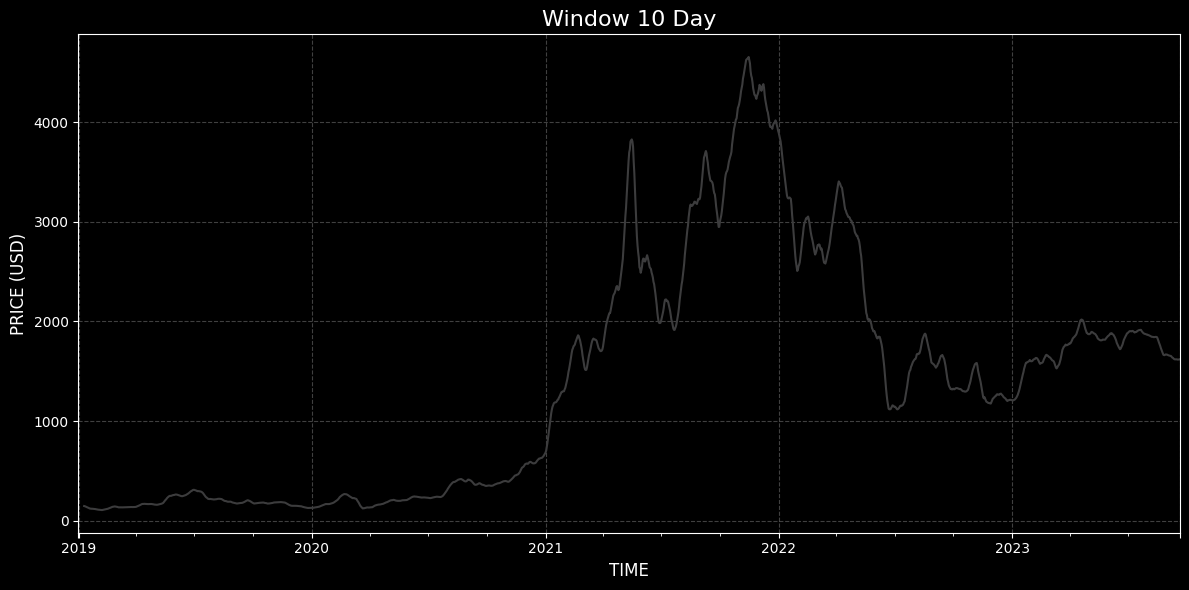

In [ ]:
plt.style.use('dark_background')  # Fondo oscuro
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
eth['feature_rolling_10_day'].plot(color=eth_color)
plt.title('Window 10 Day', fontsize=16, color='white')  # Título con fuente blanca
plt.xlabel('TIME', fontsize=12, color='white')  # Eje x con fuente blanca
plt.ylabel('PRICE (USD)', fontsize=12, color='white')  # Eje y con fuente blanca
plt.grid(True, color='gray', alpha=0.5, linestyle='--')  # Cuadrícula de fondo
plt.tight_layout()  # Ajusta los márgenes
plt.show()

In [ ]:
eth.dropna(inplace=True)
eth.head(15)

Price    Open    High     Low   Vol. Change %  \
Date                                                                        
2019-01-09 16:00:00-08:00  125.63  148.78  150.09  121.98  6.48M  -15.56%   
2019-01-10 16:00:00-08:00  125.15  125.61  127.83  121.28  3.77M   -0.39%   
2019-01-11 16:00:00-08:00  123.75  125.15  126.15  122.73  2.21M   -1.11%   
2019-01-12 16:00:00-08:00  114.64  123.75  124.09  112.79  2.98M   -7.36%   
2019-01-13 16:00:00-08:00  127.53  114.65  130.30  114.62  3.86M   11.24%   
2019-01-14 16:00:00-08:00  119.62  127.55  129.60  116.90  4.31M   -6.20%   
2019-01-15 16:00:00-08:00  121.72  119.59  126.50  119.10  3.83M    1.75%   
2019-01-16 16:00:00-08:00  122.03  121.71  123.03  117.51  3.61M    0.25%   
2019-01-17 16:00:00-08:00  119.34  122.02  122.19  118.27  2.59M   -2.20%   
2019-01-18 16:00:00-08:00  123.02  119.34  125.37  119.34  3.36M    3.09%   
2019-01-19 16:00:00-08:00  117.52  123.00  123.52  116.25  3.93M   -4.47%   
2019-01-20 16:00:00-08:00  116.05  117.52  118.04  114.15  4.80M   -1.25%   
2019-01-21 16:00:00-08:00  118.23  116.05  119.47  112.36  5.11M    1.88%   
2019-01-22 16:00:00-08:00  116.84  118.23  119.01  115.52  4.35M   -1.18%   
2019-01-23 16:00:00-08:00  116.71  116.84  117.32  114.93  4.38M   -0.11%   

                           Year  Month  Last_Day_Month  trend  dayofweek  \
Date                                                                       
2019-01-09 16:00:00-08:00  2019      1           False   True          2   
2019-01-10 16:00:00-08:00  2019      1           False   True          3   
2019-01-11 16:00:00-08:00  2019      1           False   True          4   
2019-01-12 16:00:00-08:00  2019      1           False   True          5   
2019-01-13 16:00:00-08:00  2019      1           False  False          6   
2019-01-14 16:00:00-08:00  2019      1           False   True          0   
2019-01-15 16:00:00-08:00  2019      1           False  False          1   
2019-01-16 16:00:00-08:00  2019      1           False  False          2   
2019-01-17 16:00:00-08:00  2019      1           False   True          3   
2019-01-18 16:00:00-08:00  2019      1           False  False          4   
2019-01-19 16:00:00-08:00  2019      1           False   True          5   
2019-01-20 16:00:00-08:00  2019      1           False   True          6   
2019-01-21 16:00:00-08:00  2019      1           False  False          0   
2019-01-22 16:00:00-08:00  2019      1           False   True          1   
2019-01-23 16:00:00-08:00  2019      1           False   True          2   

                           feature_lag_1_day  feature_lag_2_day  \
Date                                                              
2019-01-09 16:00:00-08:00             148.41             149.96   
2019-01-10 16:00:00-08:00             148.78             148.41   
2019-01-11 16:00:00-08:00             125.61             148.78   
2019-01-12 16:00:00-08:00             125.15             125.61   
2019-01-13 16:00:00-08:00             123.75             125.15   
2019-01-14 16:00:00-08:00             114.65             123.75   
2019-01-15 16:00:00-08:00             127.55             114.65   
2019-01-16 16:00:00-08:00             119.59             127.55   
2019-01-17 16:00:00-08:00             121.71             119.59   
2019-01-18 16:00:00-08:00             122.02             121.71   
2019-01-19 16:00:00-08:00             119.34             122.02   
2019-01-20 16:00:00-08:00             123.00             119.34   
2019-01-21 16:00:00-08:00             117.52             123.00   
2019-01-22 16:00:00-08:00             116.05             117.52   
2019-01-23 16:00:00-08:00             118.23             116.05   

                           feature_lag_4_day  feature_rolling_2_day  \
Date                                                                  
2019-01-09 16:00:00-08:00             153.48                137.210   
2019-01-10 16:00:00-08:00             154.96                125.390   
2

**4.4 Expanding-Window Features**

Ventana de tamaño dinamico

In [ ]:
eth['feature_Price_Mean'] = eth['Price'].expanding(200).mean()
eth['feature_Open_Mean'] = eth['Open'].expanding(200).mean()
eth['feature_High_Mean'] = eth['High'].expanding(200).mean()
eth['feature_Low_Mean'] = eth['Low'].expanding(200).mean()
eth.dropna(inplace=True)
eth.head()

Price    Open    High     Low   Vol. Change %  \
Date                                                                        
2019-07-27 17:00:00-07:00  210.37  206.64  212.01  199.68  7.54M    1.81%   
2019-07-28 17:00:00-07:00  209.82  210.39  214.45  207.37  7.20M   -0.26%   
2019-07-29 17:00:00-07:00  208.49  209.81  212.88  204.54  7.15M   -0.63%   
2019-07-30 17:00:00-07:00  217.23  208.49  218.19  208.17  7.51M    4.19%   
2019-07-31 17:00:00-07:00  216.37  217.23  217.55  211.23  7.09M   -0.40%   

                           Year  Month  Last_Day_Month  trend  ...  \
Date                                                           ...   
2019-07-27 17:00:00-07:00  2019      7           False  False  ...   
2019-07-28 17:00:00-07:00  2019      7           False   True  ...   
2019-07-29 17:00:00-07:00  2019      7           False   True  ...   
2019-07-30 17:00:00-07:00  2019      7           False  False  ...   
2019-07-31 17:00:00-07:00  2019      7            True   True  ...   

                           feature_lag_1_day  feature_lag_2_day  \
Date                                                              
2019-07-27 17:00:00-07:00             217.80             217.65   
2019-07-28 17:00:00-07:00             206.64             217.80   
2019-07-29 17:00:00-07:00             210.39             206.64   
2019-07-30 17:00:00-07:00             209.81             210.39   
2019-07-31 17:00:00-07:00             208.49             209.81   

                           feature_lag_4_day  feature_rolling_2_day  \
Date                                                                  
2019-07-27 17:00:00-07:00             211.86                208.495   
2019-07-28 17:00:00-07:00             215.45                210.095   
2019-07-29 17:00:00-07:00             217.65                209.155   
2019-07-30 17:00:00-07:00             217.80                212.860   
2019-07-31 17:00:00-07:00             206.64                216.800   

                           feature_rolling_7_day  feature_rolling_10_day  \
Date                                                                       
2019-07-27 17:00:00-07:00             213.864286                 217.001   
2019-07-28 17:00:00-07:00             212.800000                 215.974   
2019-07-29 17:00:00-07:00             212.317143                 214.037   
2019-07-30 17:00:00-07:00             212.572857                 213.259   
2019-07-31 17:00:00-07:00             212.390000                 213.169   

                           feature_Price_Mean  feature_Open_Mean  \
Date                                                               
2019-07-27 17:00:00-07:00          186.854700         186.544350   
2019-07-28 17:00:00-07:00          186.968955         186.662985   
2019-07-29 17:00:00-07:00          187.075495         186.777574   
2019-07-30 17:00:00-07:00          187.224039         186.884532   
2019-07-31 17:00:00-07:00          187.366912         187.033284   

                           feature_High_Mean  feature_Low_Mean  
Date                                                            
2019-07-27 17:00:00-07:00         192.974100        180.421400  
2019-07-28 17:00:00-07:00         193.080945        180.555473  
2019-07-29 17:00:00-07:00         193.178960        180.674208  
2019-07-30 17:00:00-07:00         193.302167        180.809655  
2019-07-31 17:00:00-07:00         193.421029        180.958775  

[5 rows x 21 columns]

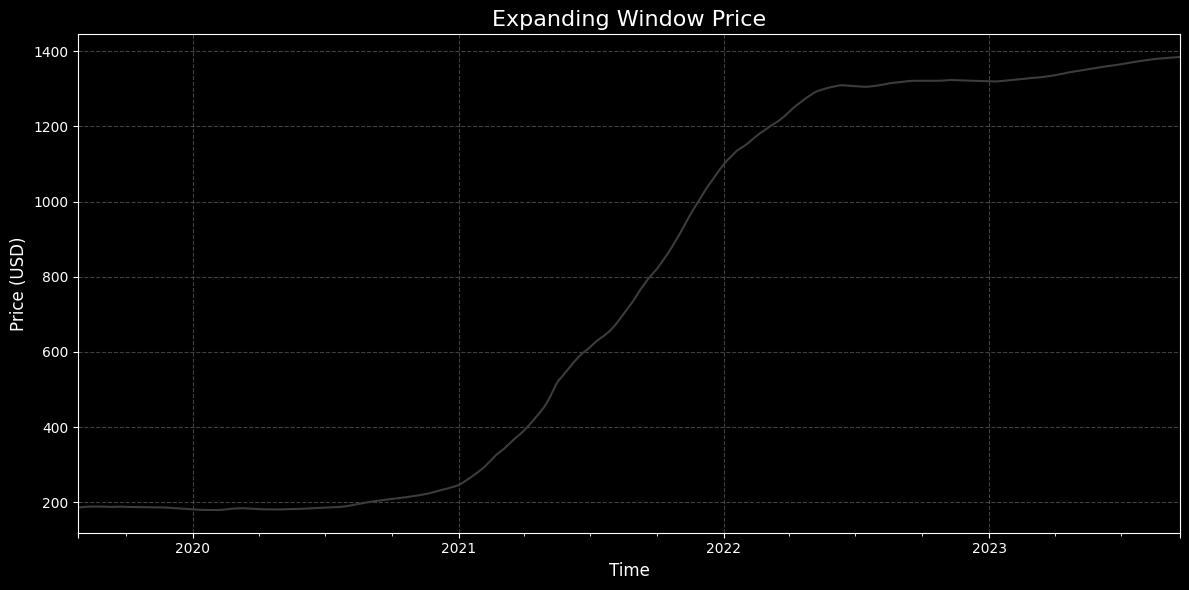

In [ ]:
plt.style.use('dark_background')  # Fondo oscuro
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
eth['feature_Price_Mean'].plot(color=eth_color)
plt.title('Expanding Window Price', fontsize=16, color='white')  # Título con fuente blanca
plt.xlabel('Time', fontsize=12, color='white')  # Eje x con fuente blanca
plt.ylabel('Price (USD)', fontsize=12, color='white')  # Eje y con fuente blanca
plt.grid(True, color='gray', alpha=0.5, linestyle='--')  # Cuadrícula de fondo
plt.tight_layout()  # Ajusta los márgenes
plt.show()


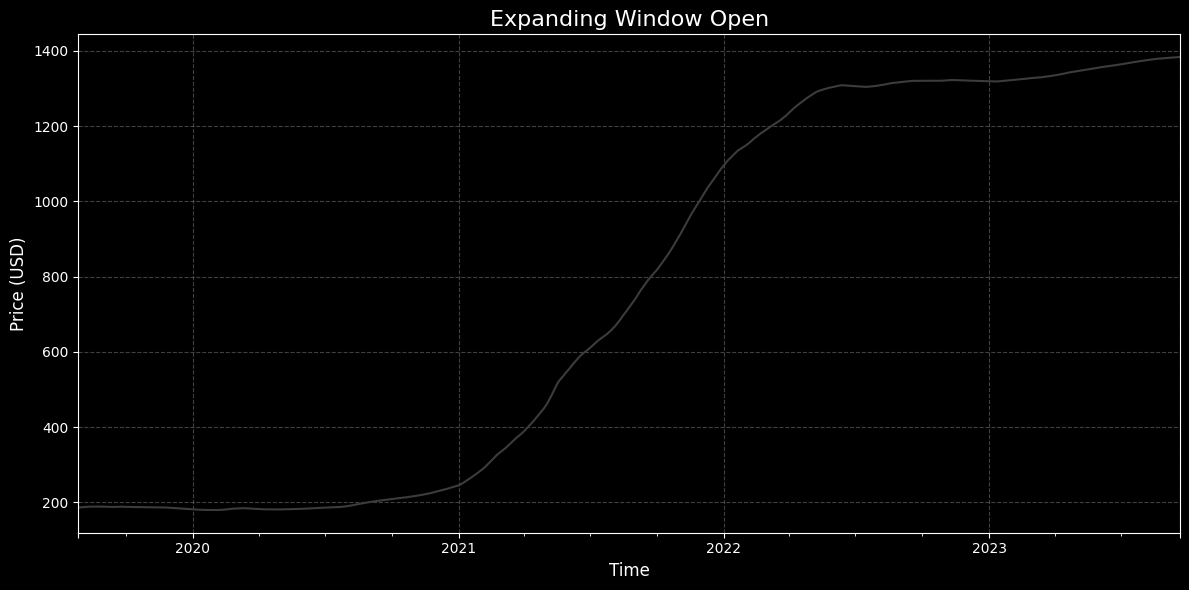

In [ ]:
plt.style.use('dark_background')  # Fondo oscuro
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
eth['feature_Open_Mean'].plot(color=eth_color)
plt.title('Expanding Window Open', fontsize=16, color='white')  # Título con fuente blanca
plt.xlabel('Time', fontsize=12, color='white')  # Eje x con fuente blanca
plt.ylabel('Price (USD)', fontsize=12, color='white')  # Eje y con fuente blanca
plt.grid(True, color='gray', alpha=0.5, linestyle='--')  # Cuadrícula de fondo
plt.tight_layout()  # Ajusta los márgenes
plt.show()

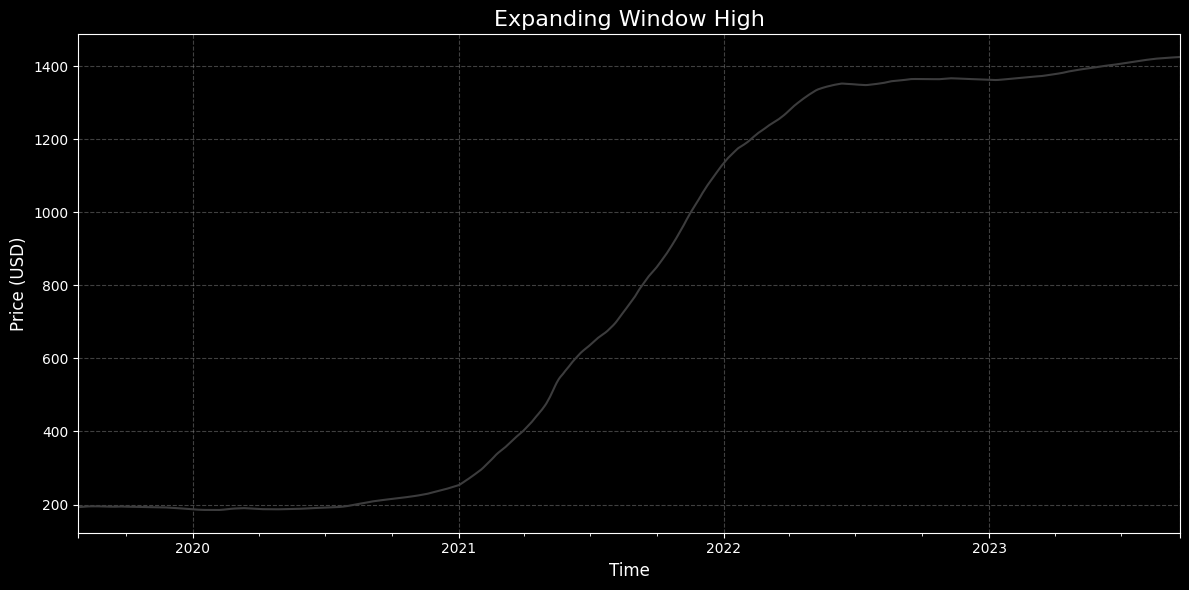

In [ ]:
plt.style.use('dark_background')  # Fondo oscuro
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
eth['feature_High_Mean'].plot(color=eth_color)
plt.title('Expanding Window High', fontsize=16, color='white')  # Título con fuente blanca
plt.xlabel('Time', fontsize=12, color='white')  # Eje x con fuente blanca
plt.ylabel('Price (USD)', fontsize=12, color='white')  # Eje y con fuente blanca
plt.grid(True, color='gray', alpha=0.5, linestyle='--')  # Cuadrícula de fondo
plt.tight_layout()  # Ajusta los márgenes
plt.show()

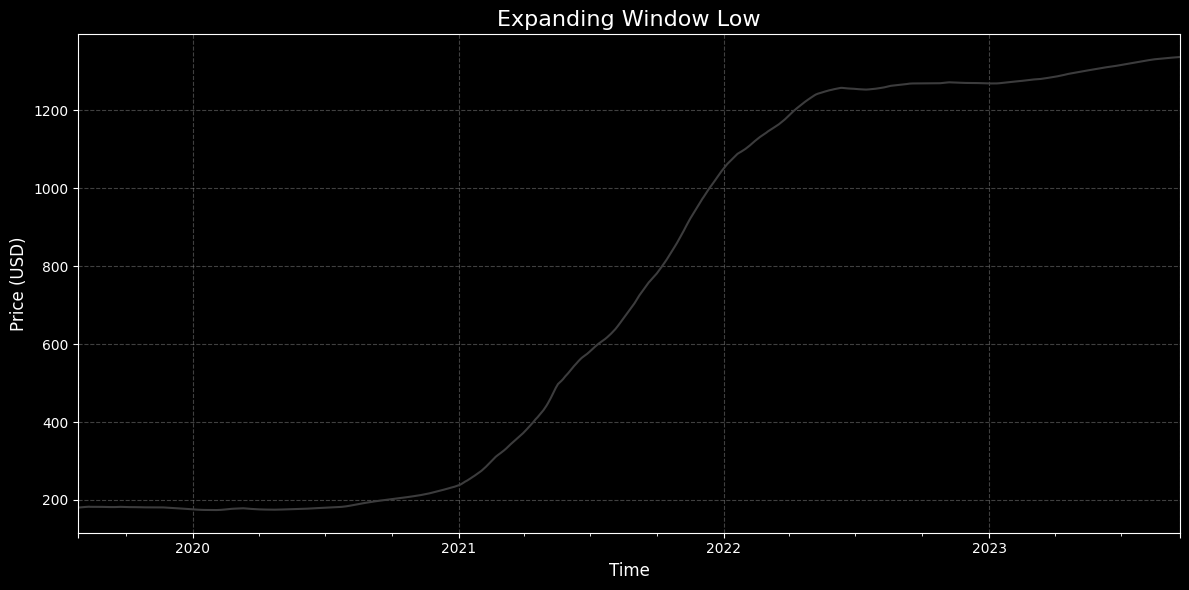

In [ ]:
plt.style.use('dark_background')  # Fondo oscuro
plt.figure(figsize=(12, 6))  # Tamaño de la gráfica
eth['feature_Low_Mean'].plot(color=eth_color)
plt.title('Expanding Window Low', fontsize=16, color='white')  # Título con fuente blanca
plt.xlabel('Time', fontsize=12, color='white')  # Eje x con fuente blanca
plt.ylabel('Price (USD)', fontsize=12, color='white')  # Eje y con fuente blanca
plt.grid(True, color='gray', alpha=0.5, linestyle='--')  # Cuadrícula de fondo
plt.tight_layout()  # Ajusta los márgenes
plt.show()

In [ ]:
del eth['Last_Day_Month']
del eth['Vol.']
del eth['Change %']

In [ ]:
eth.rename(columns={"dayofweek":"feature_down"}, inplace=True)
eth.head()

Price    Open    High     Low  Year  Month  trend  \
Date                                                                            
2019-07-27 17:00:00-07:00  210.37  206.64  212.01  199.68  2019      7  False   
2019-07-28 17:00:00-07:00  209.82  210.39  214.45  207.37  2019      7   True   
2019-07-29 17:00:00-07:00  208.49  209.81  212.88  204.54  2019      7   True   
2019-07-30 17:00:00-07:00  217.23  208.49  218.19  208.17  2019      7  False   
2019-07-31 17:00:00-07:00  216.37  217.23  217.55  211.23  2019      7   True   

                           feature_down  feature_lag_1_day  feature_lag_2_day  \
Date                                                                            
2019-07-27 17:00:00-07:00             5             217.80             217.65   
2019-07-28 17:00:00-07:00             6             206.64             217.80   
2019-07-29 17:00:00-07:00             0             210.39             206.64   
2019-07-30 17:00:00-07:00             1             209.81             210.39   
2019-07-31 17:00:00-07:00             2             208.49             209.81   

                           feature_lag_4_day  feature_rolling_2_day  \
Date                                                                  
2019-07-27 17:00:00-07:00             211.86                208.495   
2019-07-28 17:00:00-07:00             215.45                210.095   
2019-07-29 17:00:00-07:00             217.65                209.155   
2019-07-30 17:00:00-07:00             217.80                212.860   
2019-07-31 17:00:00-07:00             206.64                216.800   

                           feature_rolling_7_day  feature_rolling_10_day  \
Date                                                                       
2019-07-27 17:00:00-07:00             213.864286                 217.001   
2019-07-28 17:00:00-07:00             212.800000                 215.974   
2019-07-29 17:00:00-07:00             212.317143                 214.037   
2019-07-30 17:00:00-07:00             212.572857                 213.259   
2019-07-31 17:00:00-07:00             212.390000                 213.169   

                           feature_Price_Mean  feature_Open_Mean  \
Date                                                               
2019-07-27 17:00:00-07:00          186.854700         186.544350   
2019-07-28 17:00:00-07:00          186.968955         186.662985   
2019-07-29 17:00:00-07:00          187.075495         186.777574   
2019-07-30 17:00:00-07:00          187.224039         186.884532   
2019-07-31 17:00:00-07:00          187.366912         187.033284   

                           feature_High_Mean  feature_Low_Mean  
Date                                                            
2019-07-27 17:00:00-07:00         192.974100        180.421400  
2019-07-28 17:00:00-07:00         193.080945        180.555473  
2019-07-29 17:00:00-07:00         193.178960        180.674208  
2019-07-30 17:00:00-07:00         193.302167        180.809655  
2019-07-31 17:00:00-07:00         193.421029        180.958775



---



**PARTE 5**

I Fase

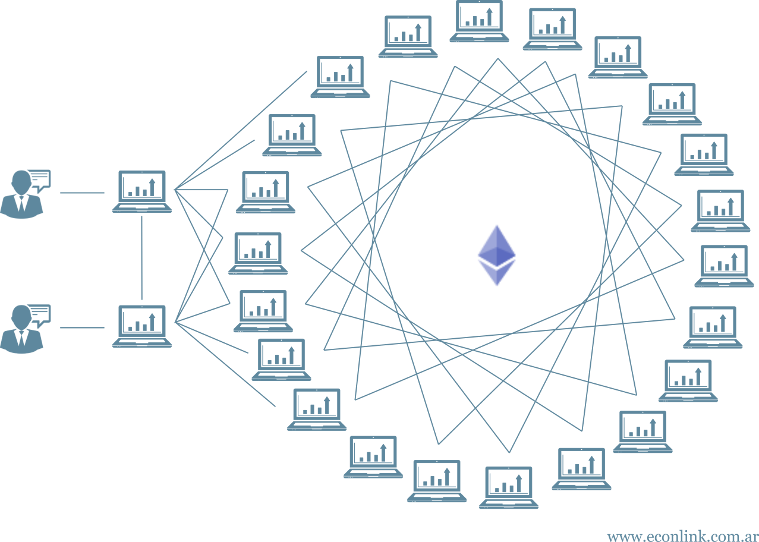

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

clf =RandomForestClassifier (random_state=0)

ml_pipeline = Pipeline([
    ('scale',StandardScaler()),
    ('classifier', clf)
])


hyperparams = {
    'classifier__criterion' : ['gini', 'entropy'],
    'classifier__min_samples_split': [2,3,5],

    'classifier__max_depth':[10,None],
    'classifier__max_features':['sqrt']
}


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
import time

*Train model*

In [ ]:
def advanced_grid_search(x_train, y_train, x_test, y_test, ml_pipeline, params, cv=3,\
                         include_probas=False, is_regression=False):
  model_grid_search=GridSearchCV(ml_pipeline, param_grid=params, cv=cv, error_score=-1)
  start_time =time.time()

  model_grid_search.fit(x_train,y_train)

  best_model=model_grid_search.best_estimator_

  y_preds = best_model.predict(x_test)

  if  is_regression:
    rmse=np.sqrt(mean_squared_error(y_pred=y_preds, y_true=test_set['trend']))
    print(f'RMSE:{rmse:.5f}')
  else:
    print(classification_report(y_true=y_test, y_pred=y_preds))
  print(f'Best params: {model_grid_search.best_params_}')
  end_time=time.time()
  print(f'Overvall took {(end_time - start_time):.2f} seconds')

  if include_probas:
    y_probas=best_model.predict_proba(x_test).max(axis=1)
    return best_model, y_preds, y_probas

  return best_model, y_preds

***Parte 5.1***

In [ ]:
for i, (train_index, test_index) in enumerate(tscv.split(eth)):
    train_times, test_times = eth.iloc[train_index].index, eth.iloc[test_index].index
    print(f'Iteration {i} \n -----------')
    print(f'''Training between {train_times.min().date()} and {train_times.max().date()} .\
Testing between {test_times.min().date()} and {test_times.max().date()}\n''')

Iteration 0 
 -----------
Training between 2019-07-27 and 2020-12-14 .Testing between 2020-12-15 and 2022-05-03

Iteration 1 
 -----------
Training between 2019-07-27 and 2022-05-03 .Testing between 2022-05-04 and 2023-09-20



In [ ]:
def split_data(eth):
  train_eth, test_eth = eth[:'2023-09-13'], eth['2019-1-13':] # select the last day for training
  # and the first day for testing
  train_x, test_x = train_eth.filter(regex='feature'), test_eth.filter (regex='feature') # split the features
  train_y, test_y = train_eth['trend'], test_eth['trend'] # split the output
  return train_eth, test_eth, train_x, train_y, test_x, test_y

In [ ]:
eth.filter(regex='feature_').corrwith(eth['trend']).sort_values()

feature_rolling_2_day     0.001060
feature_down              0.007571
feature_rolling_7_day     0.012511
feature_rolling_10_day    0.013483
feature_lag_2_day         0.016993
feature_lag_1_day         0.017527
feature_lag_4_day         0.017615
feature_High_Mean         0.046955
feature_Price_Mean        0.047041
feature_Open_Mean         0.047167
feature_Low_Mean          0.047362
dtype: float64

In [ ]:
train_eth, test_eth, train_x, train_y, test_x, test_y = split_data(eth)

print("Date-time/Lag/Window/Rolling features + Random Forest")
best_model, test_preds, test_probas = advanced_grid_search(
    train_x, train_y,
    test_x, test_y,
    ml_pipeline, hyperparams,
    cv=tscv, include_probas=True
)

Date-time/Lag/Window/Rolling features + Random Forest
              precision    recall  f1-score   support

       False       0.81      0.92      0.86       773
        True       0.90      0.77      0.83       744

    accuracy                           0.85      1517
   macro avg       0.86      0.85      0.85      1517
weighted avg       0.85      0.85      0.85      1517

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2}
Overvall took 12.14 seconds


*Punto 5.2*

In [ ]:
eth_copy=eth.copy()
del eth_copy['feature_down']
del eth_copy['feature_rolling_2_day']
del eth_copy['feature_rolling_7_day']
del eth_copy['feature_rolling_10_day']
del eth_copy['feature_lag_4_day']
del eth_copy['feature_lag_2_day']
del eth_copy['feature_lag_1_day']

In [ ]:
eth_copy.filter(regex='feature_').\
corrwith (eth_copy['trend']).sort_values ()

feature_High_Mean     0.046955
feature_Price_Mean    0.047041
feature_Open_Mean     0.047167
feature_Low_Mean      0.047362
dtype: float64

In [ ]:
def split_data_copy(price_df_copy) :
  train_eth, test_eth = eth[:'2023-09-13'], eth['2019-1-13':] # select the last day for training
  # and the first day for testing
  train_x, test_x = train_eth.filter(regex='feature'), test_eth.filter (regex='feature') # split the features
  train_y, test_y = train_eth['trend'], test_eth['trend'] # split the output
  return train_eth, test_eth, train_x, train_y, test_x, test_y

In [ ]:
train_eth, test_eth, train_x, train_y, test_x, test_y = split_data_copy(eth_copy)
print("Date-time/Lag/Window/Rolling features + Random Forest")
best_model, test_preds, test_probas = advanced_grid_search(
  train_x, train_y,
  test_x, test_y,
  ml_pipeline, hyperparams,
  cv=tscv, include_probas=True
)

Date-time/Lag/Window/Rolling features + Random Forest
              precision    recall  f1-score   support

       False       0.81      0.92      0.86       773
        True       0.90      0.77      0.83       744

    accuracy                           0.85      1517
   macro avg       0.86      0.85      0.85      1517
weighted avg       0.85      0.85      0.85      1517

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2}
Overvall took 33.27 seconds


5.3

In [ ]:
price_2022 = eth[(eth["Year"]==2022)]
price_2022.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 16:00:00-08:00 to 2022-12-31 16:00:00-08:00
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   365 non-null    float64
 1   Open                    365 non-null    float64
 2   High                    365 non-null    float64
 3   Low                     365 non-null    float64
 4   Year                    365 non-null    int64  
 5   Month                   365 non-null    int64  
 6   trend                   365 non-null    bool   
 7   feature_down            365 non-null    int64  
 8   feature_lag_1_day       365 non-null    float64
 9   feature_lag_2_day       365 non-null    float64
 10  feature_lag_4_day       365 non-null    float64
 11  feature_rolling_2_day   365 non-null    float64
 12  feature_rolling_7_day   365 non-null    float64
 13  feature_rolling_10_day  365 non-null    float6

In [ ]:
for i, (train_index, test_index) in enumerate(tscv.split(price_2022)):
  train_times, test_times = price_2022.iloc[train_index].index, price_2022.iloc[test_index].index
  print(f'Iteration {i}\n-----------')
  print(f'''Training between {train_times.min().date()} and {train_times.max().date()} .\
  Testing between {test_times.min().date()} and {test_times.max().date()}\n'''
  )

Iteration 0
-----------
Training between 2022-01-01 and 2022-05-03 .  Testing between 2022-05-04 and 2022-09-01

Iteration 1
-----------
Training between 2022-01-01 and 2022-09-01 .  Testing between 2022-09-02 and 2022-12-31



In [ ]:
def split_data_2022 (price_df_copy) :
  train_eth, test_eth = eth[:'2022-12-13'], eth['2022-1-13':] # select the last day for training
  # and the first day for testing
  train_x, test_x = train_eth.filter(regex='feature'), test_eth.filter (regex='feature') # split the features
  train_y, test_y = train_eth['trend'], test_eth['trend'] # split the output
  return train_eth, test_eth, train_x, train_y, test_x, test_y

In [ ]:
price_2022.filter(regex='feature_').corrwith(price_2022['trend'])

feature_down              0.016363
feature_lag_1_day         0.019723
feature_lag_2_day         0.016012
feature_lag_4_day         0.009371
feature_rolling_2_day    -0.017080
feature_rolling_7_day     0.006580
feature_rolling_10_day    0.004485
feature_Price_Mean        0.037953
feature_Open_Mean         0.038203
feature_High_Mean         0.037854
feature_Low_Mean          0.038396
dtype: float64

In [ ]:
train_eth, test_eth, train_eth, train_eth, test_eth, test_eth = split_data_2022(price_2022)

print('Date-time/Lag/Window/Rolling features + Random Forest')
best_model,test_preds, test_probas = advanced_grid_search(
    train_x, train_y,
    test_x, test_y,
    ml_pipeline, hyperparams,
    cv = tscv, include_probas = True
)

Date-time/Lag/Window/Rolling features + Random Forest
              precision    recall  f1-score   support

       False       0.81      0.92      0.86       773
        True       0.90      0.77      0.83       744

    accuracy                           0.85      1517
   macro avg       0.86      0.85      0.85      1517
weighted avg       0.85      0.85      0.85      1517

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2}
Overvall took 12.30 seconds


5.4

In [ ]:
price_2022_copy=price_2022.copy()
del price_2022_copy['feature_down']
del price_2022_copy['feature_rolling_2_day']
del price_2022_copy['feature_rolling_7_day']
del price_2022_copy['feature_rolling_10_day']
del price_2022_copy['feature_lag_4_day']
del price_2022_copy['feature_lag_2_day']
del price_2022_copy['feature_lag_1_day']

In [ ]:
eth_copy.filter(regex='feature_').\
corrwith (eth_copy['trend']).sort_values ()

feature_High_Mean     0.046955
feature_Price_Mean    0.047041
feature_Open_Mean     0.047167
feature_Low_Mean      0.047362
dtype: float64

In [ ]:
def split_data_2022_copy(price_2022_copy):
  train_eth, test_eth = eth[:'2022-12-13'], eth['2022-1-13':] # select the last day for training
  # and the first day for testing
  train_x, test_x = train_eth.filter(regex='feature'), test_eth.filter (regex='feature') # split the features
  train_y, test_y = train_eth['trend'], test_eth['trend'] # split the output
  return train_eth, test_eth, train_x, train_y, test_x, test_y


In [ ]:
train_eth, test_eth, train_x, train_y, test_x, test_y = split_data_2022_copy(price_2022)

print("Date-time/Lag/Window/Rolling features + Random Forest")
best_model, test_preds, test_probas = advanced_grid_search(
    train_x, train_y,
    test_x, test_y,
    ml_pipeline, hyperparams,
    cv=tscv, include_probas=True
)

Date-time/Lag/Window/Rolling features + Random Forest
              precision    recall  f1-score   support

       False       0.88      0.61      0.72       296
        True       0.72      0.92      0.81       320

    accuracy                           0.77       616
   macro avg       0.80      0.77      0.77       616
weighted avg       0.80      0.77      0.77       616

Best params: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2}
Overvall took 9.96 seconds


II Fase, cambio de split, n=6

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

clf =RandomForestClassifier (random_state=0)

ml_pipeline = Pipeline([
    ('scale',StandardScaler()),
    ('classifier', clf)
])


hyperparams = {
    'classifier__criterion' : ['gini', 'entropy'],
    'classifier__min_samples_split': [2,3,5],

    'classifier__max_depth':[10,None],
    'classifier__max_features':['sqrt']
}


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=6)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
import time

*Train model*

In [ ]:
def advanced_grid_search(x_train, y_train, x_test, y_test, ml_pipeline, hyperparams, cv=3,\
                         include_probas=False, is_regression=False):
  model_grid_search=GridSearchCV(ml_pipeline, param_grid=hyperparams, cv=cv, error_score=-1)
  start_time =time.time()

  model_grid_search.fit(x_train,y_train)

  best_model=model_grid_search.best_estimator_

  y_preds = best_model.predict(x_test)

  if  is_regression:
    rmse=np.sqrt(mean_squared_error(y_pred=y_preds, y_true=test_set['trend']))
    print(f'RMSE:{rmse:.5f}')
  else:
    print(classification_report(y_true=y_test, y_pred=y_preds))
  print(f'Best params: {model_grid_search.best_params_}')
  end_time=time.time()
  print(f'Overvall took {(end_time - start_time):.2f} seconds')

  if include_probas:
    y_probas=best_model.predict_proba(x_test).max(axis=1)
    return best_model, y_preds, y_probas

  return best_model, y_preds

***Parte 5.1***

In [ ]:
for i, (train_index, test_index) in enumerate(tscv.split(eth)):
    train_times, test_times = eth.iloc[train_index].index, eth.iloc[test_index].index
    print(f'Iteration {i} \n -----------')
    print(f'''Training between {train_times.min().date()} and {train_times.max().date()} .\
Testing between {test_times.min().date()} and {test_times.max().date()}\n''')

Iteration 0 
 -----------
Training between 2019-07-27 and 2020-03-03 .Testing between 2020-03-04 and 2020-10-05

Iteration 1 
 -----------
Training between 2019-07-27 and 2020-10-05 .Testing between 2020-10-06 and 2021-05-09

Iteration 2 
 -----------
Training between 2019-07-27 and 2021-05-09 .Testing between 2021-05-10 and 2021-12-11

Iteration 3 
 -----------
Training between 2019-07-27 and 2021-12-11 .Testing between 2021-12-12 and 2022-07-15

Iteration 4 
 -----------
Training between 2019-07-27 and 2022-07-15 .Testing between 2022-07-16 and 2023-02-16

Iteration 5 
 -----------
Training between 2019-07-27 and 2023-02-16 .Testing between 2023-02-17 and 2023-09-20



In [ ]:
def split_data(eth):
  train_eth, test_eth = eth[:'2023-09-13'], eth['2019-1-13':] # select the last day for training
  # and the first day for testing
  train_x, test_x = train_eth.filter(regex='feature'), test_eth.filter (regex='feature') # split the features
  train_y, test_y = train_eth['trend'], test_eth['trend'] # split the output
  return train_eth, test_eth, train_x, train_y, test_x, test_y

In [ ]:
eth.filter(regex='feature_').corrwith(eth['trend']).sort_values()

feature_rolling_2_day     0.001060
feature_down              0.007571
feature_rolling_7_day     0.012511
feature_rolling_10_day    0.013483
feature_lag_2_day         0.016993
feature_lag_1_day         0.017527
feature_lag_4_day         0.017615
feature_High_Mean         0.046955
feature_Price_Mean        0.047041
feature_Open_Mean         0.047167
feature_Low_Mean          0.047362
dtype: float64

In [ ]:
train_eth, test_eth, train_x, train_y, test_x, test_y = split_data(eth)

print("Date-time/Lag/Window/Rolling features + Random Forest")
best_model, test_preds, test_probas = advanced_grid_search(
    train_x, train_y,
    test_x, test_y,
    ml_pipeline, hyperparams,
    cv=tscv, include_probas=True
)

Date-time/Lag/Window/Rolling features + Random Forest
              precision    recall  f1-score   support

       False       0.81      0.92      0.86       773
        True       0.90      0.77      0.83       744

    accuracy                           0.85      1517
   macro avg       0.86      0.85      0.85      1517
weighted avg       0.85      0.85      0.85      1517

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2}
Overvall took 36.65 seconds


*Punto 5.2*

In [ ]:
eth_copy=eth.copy()
del eth_copy['feature_down']
del eth_copy['feature_rolling_2_day']
del eth_copy['feature_rolling_7_day']
del eth_copy['feature_rolling_10_day']
del eth_copy['feature_lag_4_day']
del eth_copy['feature_lag_2_day']
del eth_copy['feature_lag_1_day']

In [ ]:
eth_copy.filter(regex='feature_').\
corrwith (eth_copy['trend']).sort_values ()


feature_High_Mean     0.046955
feature_Price_Mean    0.047041
feature_Open_Mean     0.047167
feature_Low_Mean      0.047362
dtype: float64

In [ ]:
def split_data_copy(price_df_copy) :
  train_eth, test_eth = eth[:'2023-09-13'], eth['2019-1-13':] # select the last day for training
  # and the first day for testing
  train_x, test_x = train_eth.filter(regex='feature'), test_eth.filter (regex='feature') # split the features
  train_y, test_y = train_eth['trend'], test_eth['trend'] # split the output
  return train_eth, test_eth, train_x, train_y, test_x, test_y

In [ ]:
train_eth, test_eth, train_x, train_y, test_x, test_y = split_data_copy(eth_copy)
print("Date-time/Lag/Window/Rolling features + Random Forest")
best_model, test_preds, test_probas = advanced_grid_search(
  train_x, train_y,
  test_x, test_y,
  ml_pipeline, hyperparams,
  cv=tscv, include_probas=True
)

Date-time/Lag/Window/Rolling features + Random Forest
              precision    recall  f1-score   support

       False       0.81      0.92      0.86       773
        True       0.90      0.77      0.83       744

    accuracy                           0.85      1517
   macro avg       0.86      0.85      0.85      1517
weighted avg       0.85      0.85      0.85      1517

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2}
Overvall took 36.56 seconds


5.3

In [ ]:
price_2022 = eth[(eth["Year"]==2022)]
price_2022.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 16:00:00-08:00 to 2022-12-31 16:00:00-08:00
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   365 non-null    float64
 1   Open                    365 non-null    float64
 2   High                    365 non-null    float64
 3   Low                     365 non-null    float64
 4   Year                    365 non-null    int64  
 5   Month                   365 non-null    int64  
 6   trend                   365 non-null    bool   
 7   feature_down            365 non-null    int64  
 8   feature_lag_1_day       365 non-null    float64
 9   feature_lag_2_day       365 non-null    float64
 10  feature_lag_4_day       365 non-null    float64
 11  feature_rolling_2_day   365 non-null    float64
 12  feature_rolling_7_day   365 non-null    float64
 13  feature_rolling_10_day  365 non-null    float6

In [ ]:
for i, (train_index, test_index) in enumerate(tscv.split(price_2022)):
  train_times, test_times = price_2022.iloc[train_index].index, price_2022.iloc[test_index].index
  print(f'Iteration {i}\n-----------')
  print(f'''Training between {train_times.min().date()} and {train_times.max().date()} .\
  Testing between {test_times.min().date()} and {test_times.max().date()}\n'''
  )

Iteration 0
-----------
Training between 2022-01-01 and 2022-02-22 .  Testing between 2022-02-23 and 2022-04-15

Iteration 1
-----------
Training between 2022-01-01 and 2022-04-15 .  Testing between 2022-04-16 and 2022-06-06

Iteration 2
-----------
Training between 2022-01-01 and 2022-06-06 .  Testing between 2022-06-07 and 2022-07-28

Iteration 3
-----------
Training between 2022-01-01 and 2022-07-28 .  Testing between 2022-07-29 and 2022-09-18

Iteration 4
-----------
Training between 2022-01-01 and 2022-09-18 .  Testing between 2022-09-19 and 2022-11-09

Iteration 5
-----------
Training between 2022-01-01 and 2022-11-09 .  Testing between 2022-11-10 and 2022-12-31



In [ ]:
def split_data_2022 (price_df_copy) :
  train_eth, test_eth = eth[:'2022-12-13'], eth['2022-1-13':] # select the last day for training
  # and the first day for testing
  train_x, test_x = train_eth.filter(regex='feature'), test_eth.filter (regex='feature') # split the features
  train_y, test_y = train_eth['trend'], test_eth['trend'] # split the output
  return train_eth, test_eth, train_x, train_y, test_x, test_y

In [ ]:
price_2022.filter(regex='feature_').corrwith(price_2022['trend'])

feature_down              0.016363
feature_lag_1_day         0.019723
feature_lag_2_day         0.016012
feature_lag_4_day         0.009371
feature_rolling_2_day    -0.017080
feature_rolling_7_day     0.006580
feature_rolling_10_day    0.004485
feature_Price_Mean        0.037953
feature_Open_Mean         0.038203
feature_High_Mean         0.037854
feature_Low_Mean          0.038396
dtype: float64

In [ ]:
train_eth, test_eth, train_eth, train_eth, test_eth, test_eth = split_data_2022(price_2022)

print('Date-time/Lag/Window/Rolling features + Random Forest')
best_model,test_preds, test_probas = advanced_grid_search(
    train_x, train_y,
    test_x, test_y,
    ml_pipeline, hyperparams,
    cv = tscv, include_probas = True
)

Date-time/Lag/Window/Rolling features + Random Forest
              precision    recall  f1-score   support

       False       0.81      0.92      0.86       773
        True       0.90      0.77      0.83       744

    accuracy                           0.85      1517
   macro avg       0.86      0.85      0.85      1517
weighted avg       0.85      0.85      0.85      1517

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2}
Overvall took 33.91 seconds


5.4

In [ ]:
price_2022_copy=price_2022.copy()
del price_2022_copy['feature_down']
del price_2022_copy['feature_rolling_2_day']
del price_2022_copy['feature_rolling_7_day']
del price_2022_copy['feature_rolling_10_day']
del price_2022_copy['feature_lag_4_day']
del price_2022_copy['feature_lag_2_day']
del price_2022_copy['feature_lag_1_day']

In [ ]:
eth_copy.filter(regex='feature_').\
corrwith (eth_copy['trend']).sort_values ()

feature_High_Mean     0.046955
feature_Price_Mean    0.047041
feature_Open_Mean     0.047167
feature_Low_Mean      0.047362
dtype: float64

In [ ]:
def split_data_2022_copy(price_2022_copy):
  train_eth, test_eth = eth[:'2022-12-13'], eth['2022-1-13':] # select the last day for training
  # and the first day for testing
  train_x, test_x = train_eth.filter(regex='feature'), test_eth.filter (regex='feature') # split the features
  train_y, test_y = train_eth['trend'], test_eth['trend'] # split the output
  return train_eth, test_eth, train_x, train_y, test_x, test_y


In [ ]:
train_eth, test_eth, train_x, train_y, test_x, test_y = split_data_2022_copy(price_2022)

print("Date-time/Lag/Window/Rolling features + Random Forest")
best_model, test_preds, test_probas = advanced_grid_search(
    train_x, train_y,
    test_x, test_y,
    ml_pipeline, hyperparams,
    cv=tscv, include_probas=True
)

Date-time/Lag/Window/Rolling features + Random Forest
              precision    recall  f1-score   support

       False       0.84      0.53      0.65       296
        True       0.68      0.91      0.78       320

    accuracy                           0.73       616
   macro avg       0.76      0.72      0.71       616
weighted avg       0.76      0.73      0.72       616

Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 5}
Overvall took 28.74 seconds


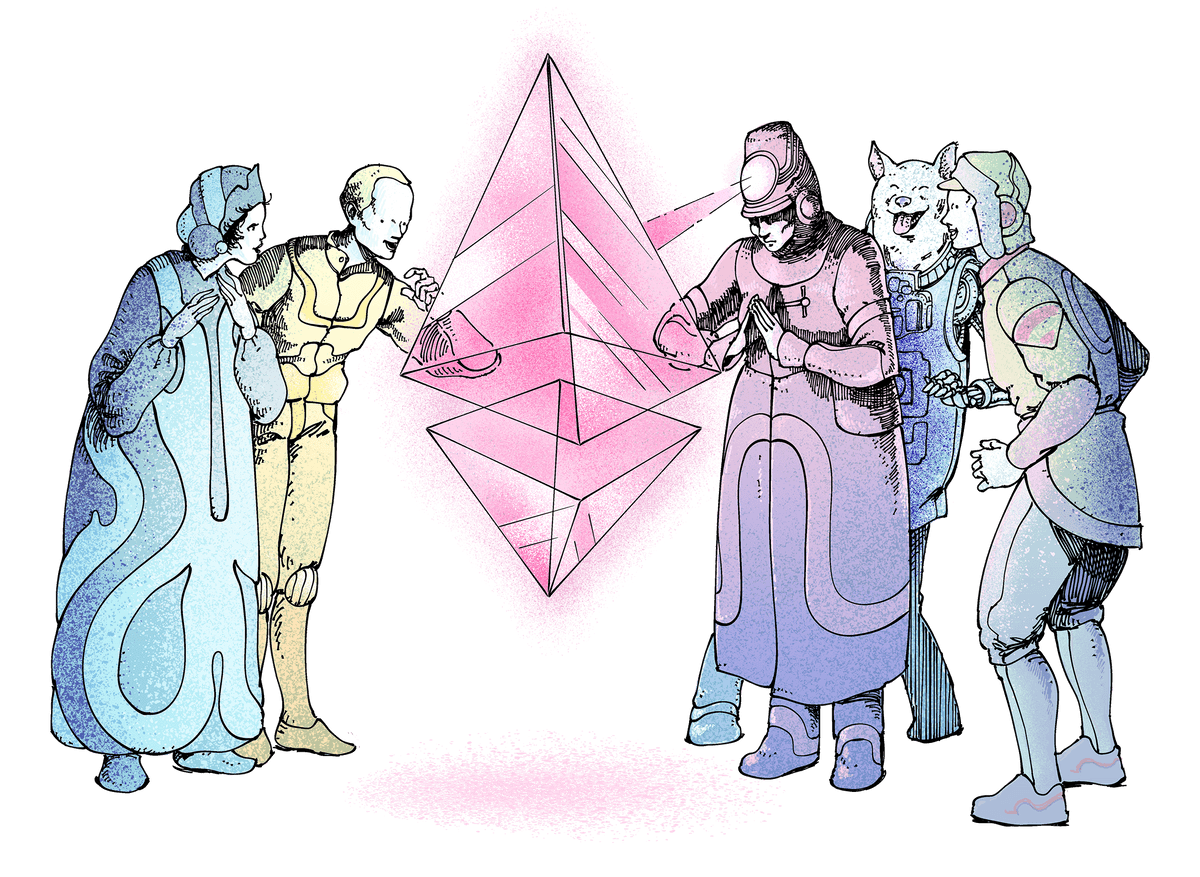